In [ ]:
# Enhancing Lung Sound Classification Using Transfer Learning with ResNet50 and Mel Spectrogram Pre-processing.
# Berikut langkah-langkah yang dilakukan pada penelitian lung sounds.
# 1. Pengumpulan Dataset:
#    Lokasi: /content/drive/MyDrive/Original.
#    Label dataset: Normal, Crackles, Wheezes, Rhonchi, Crackles_Wheezes.
# Jumlah file di folder Normal: 449 (Kaggle)
# Jumlah file di folder Crackles: 514 (ICBHI : 257 + Kaggle : 257)
# Jumlah file di folder Wheezes: 232 (ICBHI : 116 + Kaggle : 116)
# Jumlah file di folder Rhonchi: 52 (FHI)
# Jumlah file di folder Crackles_Wheezes: 116 (ICBHI : 58 + Kaggle : 58)
# Jumlah kelas: 5
# 2. Pra-pemrosesan:
#    a. Konversi Data Audio ke representasi tensor-float
#    b. Frekuensi sampling dengan target sampling rate sebesar 16 kHz (untuk mencapai keseragaman dan standarisasi).
#    c. Transformasi ke Mel Spectrogram
# 3. Augmentasi data dari Google Brain's SpecAugment".
# Hasil :
# Jumlah data untuk 1_Normal: 514
# Jumlah data untuk 2_Crackles: 514
# Jumlah data untuk 3_Wheezes: 514
# Jumlah data untuk 4_Rhonchi: 514
# Jumlah data untuk 5_Crackles_Wheezes: 514
# 4. 10 Fold Cros Validation
# 5. Menjalankan Transfer Learning with Model ResNet50
# evaluasi metrik seperti accuracy, precision, recall, f1_score, auc dan confusion matrix.
#===============================================================================================================================================


In [ ]:
#Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import os
!pip install librosa
import librosa
import soundfile as sf
!pip install soundfile
import librosa.display
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
#import pywt
from scipy import signal
!pip install tensorflow tensorflow_hub librosa scikit-learn

In [ ]:
# Load packgae drive
from google.colab import drive

In [ ]:
# Memberikan akses kepada Colab / Autorization
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Menentukan path direktori utama
direktori_utama = "/content/drive/MyDrive/Original"

# Menentukan path untuk masing-masing folder
path_normal = os.path.join(direktori_utama, "1_Normal")
path_crackles = os.path.join(direktori_utama, "2_Crackles")
path_wheezes = os.path.join(direktori_utama, "3_Wheezes")
path_rhonchi = os.path.join(direktori_utama, "4_Rhonchi")
path_crackles_wheezes = os.path.join(direktori_utama, "5_Crackles_Wheezes")

# Mendefinisikan label
labels = ["Normal", "Crackles", "Wheezes", "Rhonchi", "Crackles_Wheezes"]
num_classes = len(labels)

# Mendapatkan daftar file di masing-masing folder
file_normal = os.listdir(path_normal)
file_crackles = os.listdir(path_crackles)
file_wheezes = os.listdir(path_wheezes)
file_rhonchi = os.listdir(path_rhonchi)
file_crackles_wheezes = os.listdir(path_crackles_wheezes)

# Menampilkan jumlah file di masing-masing folder
print("Jumlah file di folder Normal:", len(file_normal))
print("Jumlah file di folder Crackles:", len(file_crackles))
print("Jumlah file di folder Wheezes:", len(file_wheezes))
print("Jumlah file di folder Rhonchi:", len(file_rhonchi))
print("Jumlah file di folder Crackles_Wheezes:", len(file_crackles_wheezes))

# Menampilkan jumlah kelas
print("Jumlah kelas:", num_classes)

Jumlah file di folder Normal: 449
Jumlah file di folder Crackles: 514
Jumlah file di folder Wheezes: 232
Jumlah file di folder Rhonchi: 52
Jumlah file di folder Crackles_Wheezes: 116
Jumlah kelas: 5


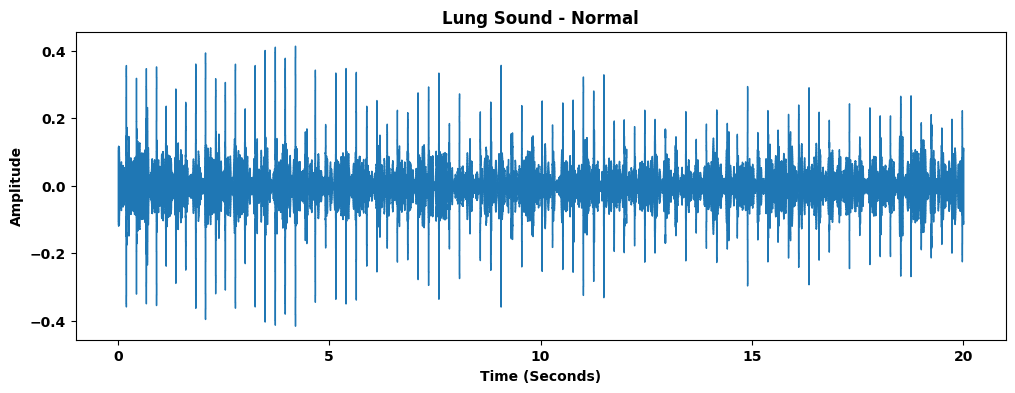

In [ ]:
# Menampilkan sinyal suara paru-paru Normal
# Tulisan dan angka diberi Bold atau tebal
# Menampilkan sinyal suara paru-paru Normal
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

# Mengatur path file
file_path = '/content/drive/MyDrive/Original/1_Normal/Normal_K1.wav'

# Membaca file audio
signal, sr = librosa.load(file_path, sr=None)  # sr=None untuk memastikan menggunakan sample rate asli

# Menghitung waktu (dalam detik) untuk setiap sampel
times = np.arange(len(signal)) / sr

# Membuat plot
plt.figure(figsize=(12, 4))
librosa.display.waveshow(signal, sr=sr)

# Label dan judul dengan huruf tebal
plt.xlabel('Time (Seconds)', fontweight='bold')
plt.ylabel('Amplitude', fontweight='bold')
plt.title('Lung Sound - Normal', fontweight='bold')

# Membuat angka pada sumbu X dan Y menjadi bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()


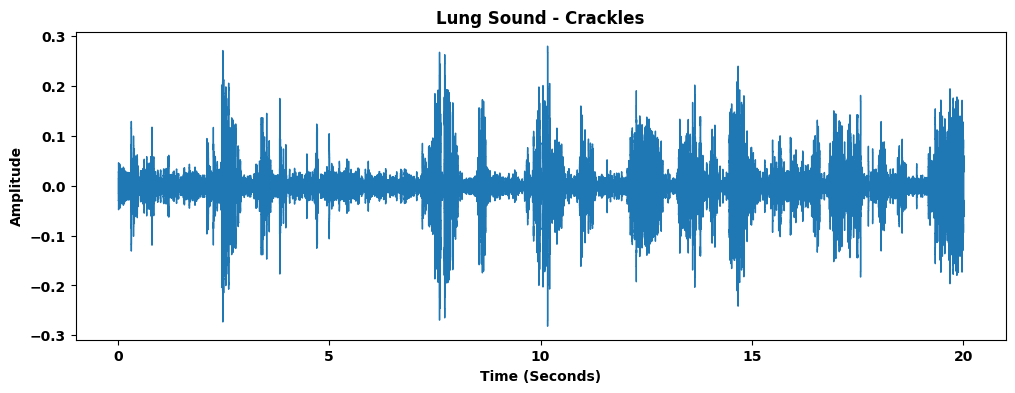

In [ ]:
# Amplitude, Time Seconds diberi Bold atau hitam tebal.
# Angka disumbu vertikal dan horizontal diberi bold
# Menampilkan sinyal suara paru-paru Crackles
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

# Mengatur path file
file_path = '/content/drive/MyDrive/Original/2_Crackles/Crackles_I1.wav'

# Membaca file audio
signal, sr = librosa.load(file_path, sr=None)  # sr=None untuk memastikan menggunakan sample rate asli

# Menghitung waktu (dalam detik) untuk setiap sampel
times = np.arange(len(signal)) / sr

# Membuat plot
plt.figure(figsize=(12, 4))
librosa.display.waveshow(signal, sr=sr)

# Label dan judul dengan huruf tebal
plt.xlabel('Time (Seconds)', fontweight='bold')
plt.ylabel('Amplitude', fontweight='bold')
plt.title('Lung Sound - Crackles', fontweight='bold')

# Membuat angka pada sumbu X dan Y menjadi bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()


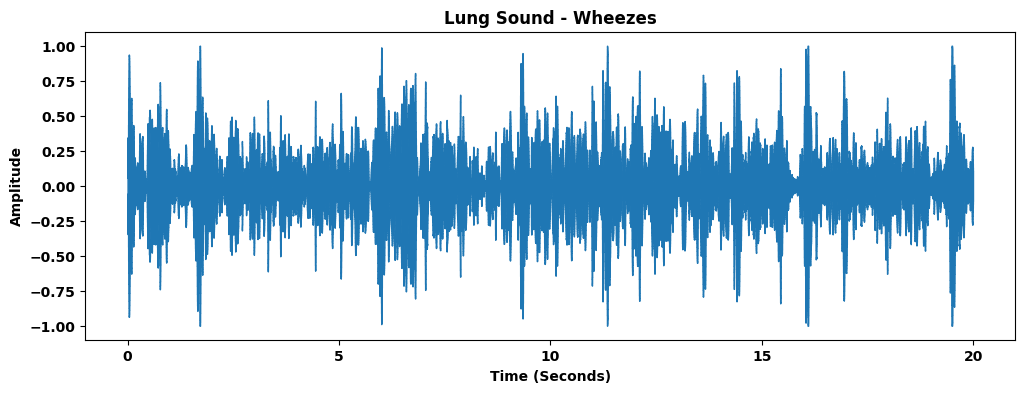

In [ ]:
# Amplitude, Time Seconds diberi Bold atau hitam tebal.
# Angka disumbu vertikal dan horizontal diberi bold
# Menampilkan sinyal suara paru-paru Wheezes
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

# Mengatur path file
file_path = '/content/drive/MyDrive/Original/3_Wheezes/Wheezes_I1.wav'

# Membaca file audio
signal, sr = librosa.load(file_path, sr=None)  # sr=None untuk memastikan menggunakan sample rate asli

# Menghitung waktu (dalam detik) untuk setiap sampel
times = np.arange(len(signal)) / sr

# Membuat plot
plt.figure(figsize=(12, 4))
librosa.display.waveshow(signal, sr=sr)

# Label dan judul dengan huruf tebal
plt.xlabel('Time (Seconds)', fontweight='bold')
plt.ylabel('Amplitude', fontweight='bold')
plt.title('Lung Sound - Wheezes', fontweight='bold')

# Membuat angka pada sumbu X dan Y menjadi bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()


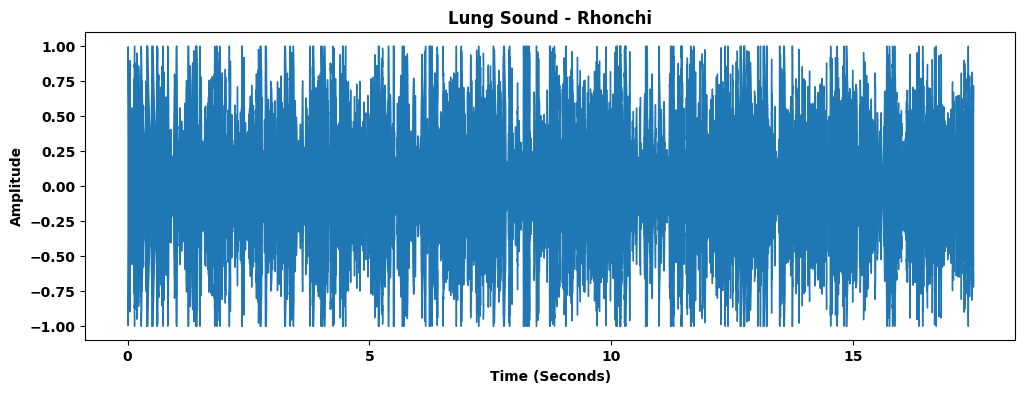

In [ ]:
# Amplitude, Time Seconds diberi Bold atau hitam tebal.
# Menampilkan sinyal suara paru-paru Rhonchi
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

# Mengatur path file
file_path = '/content/drive/MyDrive/Original/4_Rhonchi/Rhonchi_10_FHI.wav'

# Membaca file audio
signal, sr = librosa.load(file_path, sr=None)  # sr=None untuk memastikan menggunakan sample rate asli

# Menghitung waktu (dalam detik) untuk setiap sampel
times = np.arange(len(signal)) / sr

# Membuat plot
plt.figure(figsize=(12, 4))
librosa.display.waveshow(signal, sr=sr)

# Label dan judul dengan huruf tebal
plt.xlabel('Time (Seconds)', fontweight='bold')
plt.ylabel('Amplitude', fontweight='bold')
plt.title('Lung Sound - Rhonchi', fontweight='bold')

# Membuat angka pada sumbu X dan Y menjadi bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()


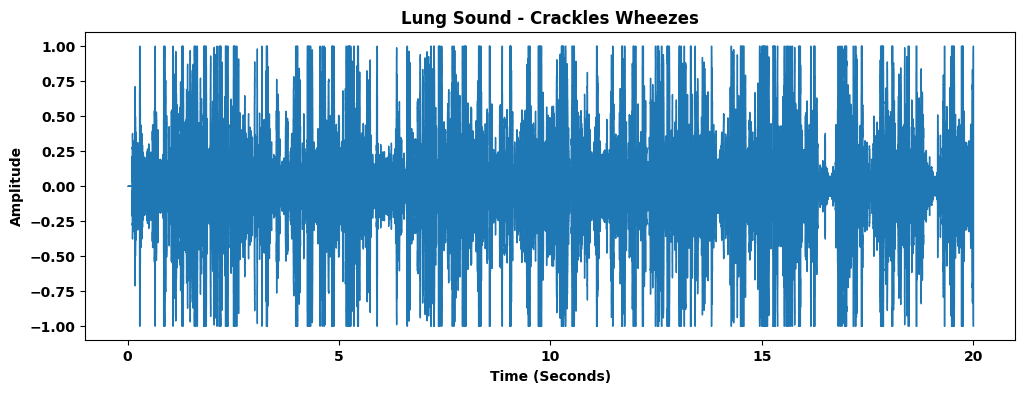

In [ ]:
# Amplitude, Time Seconds diberi Bold atau hitam tebal.
# Angka disumbu vertikal dan horizontal diberi bold
# Menampilkan sinyal suara paru-paru Crackles Wheezes
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

# Mengatur path file
file_path = '/content/drive/MyDrive/Original/5_Crackles_Wheezes/Crackles and Wheezes_I1.wav'

# Membaca file audio
signal, sr = librosa.load(file_path, sr=None)  # sr=None untuk memastikan menggunakan sample rate asli

# Menghitung waktu (dalam detik) untuk setiap sampel
times = np.arange(len(signal)) / sr

# Membuat plot
plt.figure(figsize=(12, 4))
librosa.display.waveshow(signal, sr=sr)

# Label dan judul dengan huruf tebal
plt.xlabel('Time (Seconds)', fontweight='bold')
plt.ylabel('Amplitude', fontweight='bold')
plt.title('Lung Sound - Crackles Wheezes', fontweight='bold')

# Membuat angka pada sumbu X dan Y menjadi bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()


In [ ]:
# Konversi Data Audio ke representasi tensor-float
import os
import librosa
import numpy as np

def convert_audio_to_tensor_float(input_path, output_path):
    """
    Converts audio files from the input path to tensor-float representation and saves them to the output path.
    """
    for folder in ["1_Normal", "2_Crackles", "3_Wheezes", "4_Rhonchi", "5_Crackles_Wheezes"]:
        input_folder_path = os.path.join(input_path, folder)
        output_folder_path = os.path.join(output_path, folder)

        # Create output directory if it doesn't exist
        os.makedirs(output_folder_path, exist_ok=True)

        for filename in os.listdir(input_folder_path):
            if filename.endswith('.wav'):
                # Load audio file
                file_path = os.path.join(input_folder_path, filename)
                audio_data, sr = librosa.load(file_path, sr=None)

                # Convert audio data to tensor (numpy array)
                audio_tensor = np.array(audio_data, dtype=np.float32)

                # Save tensor to output path
                output_file_path = os.path.join(output_folder_path, filename.replace('.wav', '.npy'))
                np.save(output_file_path, audio_tensor)
                print(f"Processed and saved {output_file_path}")

# Define paths
input_path = "/content/drive/MyDrive/Original"
output_path = "/content/drive/MyDrive/Processed/0_Konversi data audio ke representasi tensor-float"

# Run conversion
convert_audio_to_tensor_float(input_path, output_path)

# Print completion message
print("Proses konversi telah selesai dilakukan.")


In [ ]:
# Menampilkan Jumlah file audio yang berhasil dikonversi ke representasi tensor-float
import os

def count_converted_files(output_path):
    """
    Counts the number of tensor-float files in the output path.
    """
    total_files = 0
    folder_counts = {}

    for folder in ["1_Normal", "2_Crackles", "3_Wheezes", "4_Rhonchi", "5_Crackles_Wheezes"]:
        output_folder_path = os.path.join(output_path, folder)
        if os.path.exists(output_folder_path):
            file_count = len([f for f in os.listdir(output_folder_path) if f.endswith('.npy')])
            folder_counts[folder] = file_count
            total_files += file_count

    return folder_counts, total_files

# Define output path
output_path = "/content/drive/MyDrive/Processed/0_Konversi data audio ke representasi tensor-float"

# Count converted files
folder_counts, total_files = count_converted_files(output_path)

# Print results
print("Jumlah file yang berhasil dikonversi di setiap folder:")
for folder, count in folder_counts.items():
    print(f"{folder}: {count} file")

print(f"Total file yang berhasil dikonversi: {total_files} file")


In [ ]:
# Resampling ke laju samping 16kHz
import os
import librosa
import soundfile as sf

def resample_audio(file_path, target_sampling_rate=16000):
    audio, original_sampling_rate = librosa.load(file_path, sr=None, mono=True)
    resampled_audio = librosa.resample(audio, orig_sr=original_sampling_rate, target_sr=target_sampling_rate)
    return resampled_audio

base_path = "/content/drive/MyDrive/Original"
processed_path = "/content/drive/MyDrive/Processed/1_Frekuensi Sampling"
folders = ["1_Normal", "2_Crackles","3_Wheezes","4_Rhonchi","5_Crackles_Wheezes"]

for folder in folders:
    folder_path = os.path.join(base_path, folder)
    processed_folder_path = os.path.join(processed_path, folder)

    # Membuat direktori untuk setiap kelas jika belum ada
    if not os.path.exists(processed_folder_path):
        os.makedirs(processed_folder_path)

    audio_files = [f for f in os.listdir(folder_path) if f.endswith('.wav') or f.endswith('.mp3')]
    jumlah_disampling = 0

    for audio_file in audio_files:
        file_path = os.path.join(folder_path, audio_file)
        resampled_audio = resample_audio(file_path, target_sampling_rate=16000)
        output_path = os.path.join(processed_folder_path, audio_file)
        sf.write(output_path, resampled_audio, 16000)
        jumlah_disampling += 1

    print(f"Jumlah file yang telah disampling di folder '{folder}': {jumlah_disampling}")


In [ ]:
# Mengubah dalam bentuk Mel Spectogram
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Direktori sumber dan tujuan
source_base_dir = '/content/drive/MyDrive/Processed/1_Frekuensi Sampling'
target_base_dir = '/content/drive/MyDrive/Processed/2_Mel Spectogram'
folders = ["1_Normal", "2_Crackles", "3_Wheezes", "4_Rhonchi", "5_Crackles_Wheezes"]

# Membuat folder tujuan jika belum ada
for folder in folders:
    target_folder = os.path.join(target_base_dir, folder)
    os.makedirs(target_folder, exist_ok=True)

def create_mel_spectrogram(file_path, save_path):
    # Load file audio
    y, sr = librosa.load(file_path)
    # Mengubah sinyal audio menjadi Mel Spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    S_DB = librosa.power_to_db(S, ref=np.max)

    # Menyimpan Mel Spectrogram sebagai gambar
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()

# Proses setiap folder dan file di dalamnya
for folder in folders:
    source_folder = os.path.join(source_base_dir, folder)
    target_folder = os.path.join(target_base_dir, folder)

    for filename in os.listdir(source_folder):
        if filename.endswith('.wav'):
            source_file_path = os.path.join(source_folder, filename)
            target_file_path = os.path.join(target_folder, os.path.splitext(filename)[0] + '.png')
            create_mel_spectrogram(source_file_path, target_file_path)



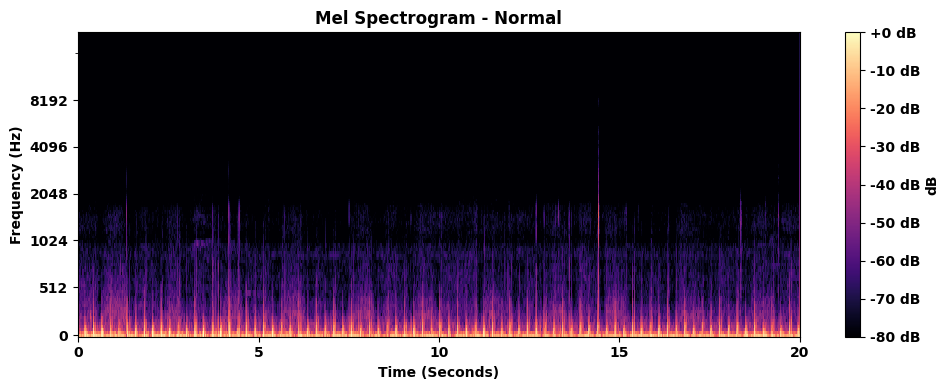

In [ ]:
# Menampilkan Mel Spectogram - Normal
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

# Path ke file audio
file_path = '/content/drive/MyDrive/Original/1_Normal/Normal_K1.wav'

# Load audio
y, sr = librosa.load(file_path, sr=None)

# Konversi ke Mel Spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)

# Plot Mel Spectrogram
plt.figure(figsize=(10, 4))
img = librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')

# Atur batas waktu maksimum 20 detik
plt.xlim([0, 20])

# Atur sumbu Y khusus dan bold
plt.yticks([0, 512, 1024, 2048, 4096, 8192], fontweight='bold')
plt.xticks(fontweight='bold')

# Label dan judul bold
plt.xlabel('Time (Seconds)', fontweight='bold')
plt.ylabel('Frequency (Hz)', fontweight='bold')
plt.title('Mel Spectrogram - Normal', fontweight='bold')

# Colorbar dengan dB dalam bold
cbar = plt.colorbar(format='%+2.0f dB')
cbar.set_label('dB', fontweight='bold')
for label in cbar.ax.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()


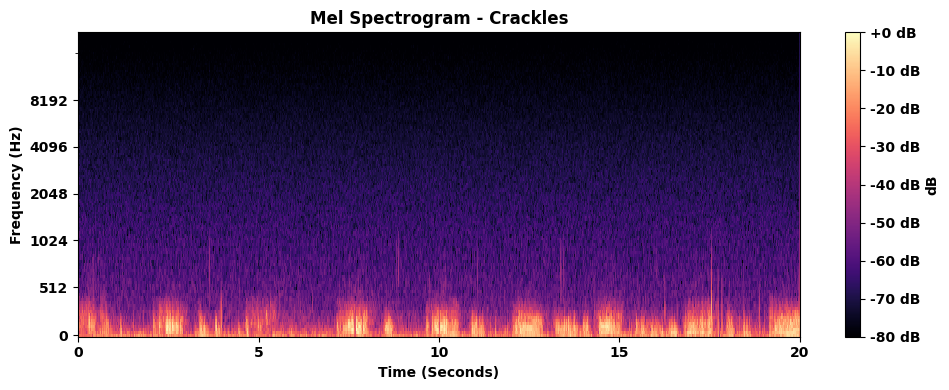

In [ ]:
# Menampilkan Mel Spectogram - Crackles
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

# Path ke file audio
file_path = '/content/drive/MyDrive/Original/2_Crackles/Crackles_I1.wav'

# Load audio
y, sr = librosa.load(file_path, sr=None)

# Konversi ke Mel Spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)

# Plot Mel Spectrogram
plt.figure(figsize=(10, 4))
img = librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')

# Atur batas waktu maksimum 20 detik
plt.xlim([0, 20])

# Atur sumbu Y khusus dan bold
plt.yticks([0, 512, 1024, 2048, 4096, 8192], fontweight='bold')
plt.xticks(fontweight='bold')

# Label dan judul bold
plt.xlabel('Time (Seconds)', fontweight='bold')
plt.ylabel('Frequency (Hz)', fontweight='bold')
plt.title('Mel Spectrogram - Crackles', fontweight='bold')

# Colorbar dengan dB dalam bold
cbar = plt.colorbar(format='%+2.0f dB')
cbar.set_label('dB', fontweight='bold')
for label in cbar.ax.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()

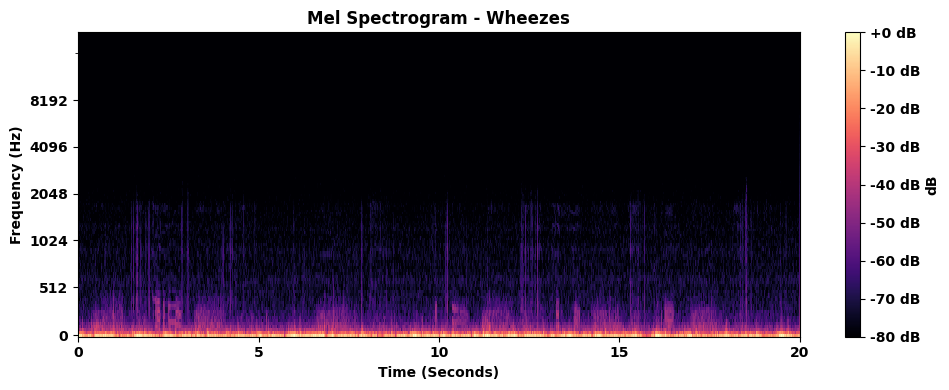

In [ ]:
# Menampilkan Mel Spectogram - Wheezes
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

# Path ke file audio
file_path = '/content/drive/MyDrive/Original/3_Wheezes/Wheezes_I1.wav'

# Load audio
y, sr = librosa.load(file_path, sr=None)

# Konversi ke Mel Spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)

# Plot Mel Spectrogram
plt.figure(figsize=(10, 4))
img = librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')

# Atur batas waktu maksimum 20 detik
plt.xlim([0, 20])

# Atur sumbu Y khusus dan bold
plt.yticks([0, 512, 1024, 2048, 4096, 8192], fontweight='bold')
plt.xticks(fontweight='bold')

# Label dan judul bold
plt.xlabel('Time (Seconds)', fontweight='bold')
plt.ylabel('Frequency (Hz)', fontweight='bold')
plt.title('Mel Spectrogram - Wheezes', fontweight='bold')

# Colorbar dengan dB dalam bold
cbar = plt.colorbar(format='%+2.0f dB')
cbar.set_label('dB', fontweight='bold')
for label in cbar.ax.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()

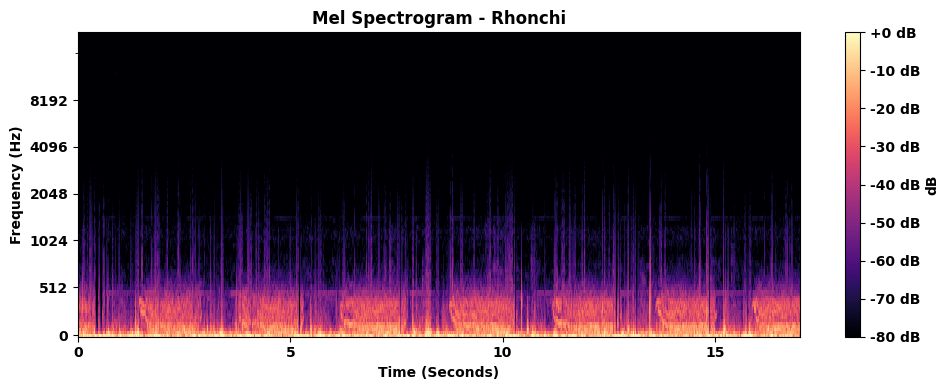

In [ ]:
# Menampilkan Mel Spectogram - Rhonchi
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

# Path ke file audio
file_path = '/content/drive/MyDrive/Original/4_Rhonchi/Rhonchi_10_FHI.wav'

# Load audio
y, sr = librosa.load(file_path, sr=None)

# Konversi ke Mel Spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)

# Plot Mel Spectrogram
plt.figure(figsize=(10, 4))
img = librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')

# Atur batas waktu maksimum 17 detik
plt.xlim([0, 17])

# Atur sumbu Y khusus dan bold
plt.yticks([0, 512, 1024, 2048, 4096, 8192], fontweight='bold')
plt.xticks(fontweight='bold')

# Label dan judul bold
plt.xlabel('Time (Seconds)', fontweight='bold')
plt.ylabel('Frequency (Hz)', fontweight='bold')
plt.title('Mel Spectrogram - Rhonchi', fontweight='bold')

# Colorbar dengan dB dalam bold
cbar = plt.colorbar(format='%+2.0f dB')
cbar.set_label('dB', fontweight='bold')
for label in cbar.ax.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()

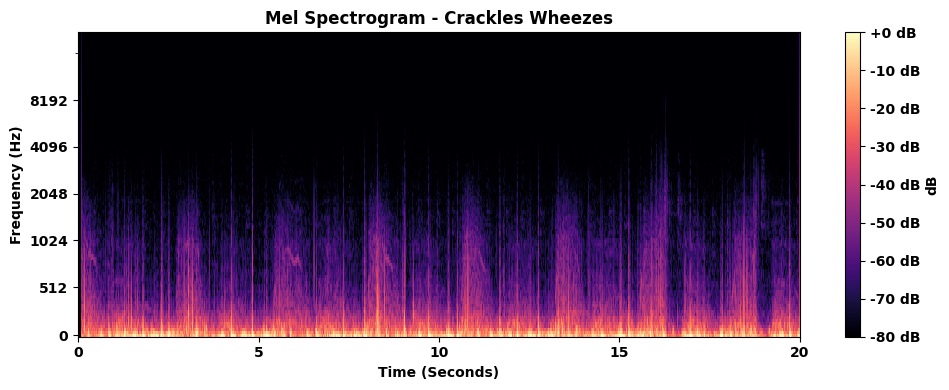

In [ ]:
# Menampilkan Mel Spectogram - Crackles Wheezes
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

# Path ke file audio
file_path = '/content/drive/MyDrive/Original/5_Crackles_Wheezes/Crackles and Wheezes_I1.wav'

# Load audio
y, sr = librosa.load(file_path, sr=None)

# Konversi ke Mel Spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)

# Plot Mel Spectrogram
plt.figure(figsize=(10, 4))
img = librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')

# Atur batas waktu maksimum 20 detik
plt.xlim([0, 20])

# Atur sumbu Y khusus dan bold
plt.yticks([0, 512, 1024, 2048, 4096, 8192], fontweight='bold')
plt.xticks(fontweight='bold')

# Label dan judul bold
plt.xlabel('Time (Seconds)', fontweight='bold')
plt.ylabel('Frequency (Hz)', fontweight='bold')
plt.title('Mel Spectrogram - Crackles Wheezes', fontweight='bold')

# Colorbar dengan dB dalam bold
cbar = plt.colorbar(format='%+2.0f dB')
cbar.set_label('dB', fontweight='bold')
for label in cbar.ax.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()

In [ ]:
# Menampilkan jumlah file pada masing-masing kelas Mel Spectogram
import os

# Path to the main directory
base_path = "/content/drive/MyDrive/Processed/2_Mel Spectogram"

# List of folders to check
folders = ["1_Normal", "2_Crackles", "3_Wheezes", "4_Rhonchi", "5_Crackles_Wheezes"]

# Function to count files in a folder
def count_files_in_folder(folder_path):
    try:
        return len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])
    except FileNotFoundError:
        return 0

# Iterate through each folder and count the files
file_counts = {}
for folder in folders:
    folder_path = os.path.join(base_path, folder)
    file_counts[folder] = count_files_in_folder(folder_path)

# Print the results
for folder, count in file_counts.items():
    print(f"Jumlah file di {folder}: {count}")


In [ ]:
# Data Augmentation dengan SpecAugment  (Augmentasi data dari Google Brain's SpecAugment)
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import shutil
import random

# Definisi SpecAugment
def time_warp(spec, W=5):
    num_rows = spec.shape[1]
    src_pts = np.random.randint(W, num_rows - W, size=1)
    dest_pts = src_pts + np.random.randint(-W, W, size=1)
    spec[:, src_pts] = spec[:, dest_pts]
    return spec

def freq_mask(spec, F=30, num_masks=1):
    cloned = spec.copy()
    num_mel_channels = cloned.shape[0]
    for _ in range(num_masks):
        f = np.random.uniform(0, F)
        f_zero = int(np.random.uniform(0, num_mel_channels - f))
        cloned[f_zero:f_zero + int(f)] = 0
    return cloned

def time_mask(spec, T=40, num_masks=1):
    cloned = spec.copy()
    len_spectro = cloned.shape[1]
    for _ in range(num_masks):
        t = np.random.uniform(0, T)
        t_zero = int(np.random.uniform(0, len_spectro - t))
        cloned[:, t_zero:t_zero + int(t)] = 0
    return cloned

def spec_augment(spec, W=5, F=30, T=40, num_freq_masks=1, num_time_masks=1):
    spec = time_warp(spec, W)
    spec = freq_mask(spec, F, num_freq_masks)
    spec = time_mask(spec, T, num_time_masks)
    return spec

# Path dan folder
input_base_path = '/content/drive/MyDrive/Processed/2_Mel Spectogram'
output_base_path = '/content/drive/MyDrive/Processed/3_Augmentasi data dengan SpecAugment'
folders = ["1_Normal", "2_Crackles", "3_Wheezes", "4_Rhonchi", "5_Crackles_Wheezes"]

# Target jumlah data per kelas
target_count = 514
class_counts = {
    "1_Normal": 449,
    "2_Crackles": 514,
    "3_Wheezes": 232,
    "4_Rhonchi": 52,
    "5_Crackles_Wheezes": 50
}

# Buat folder output jika belum ada
if not os.path.exists(output_base_path):
    os.makedirs(output_base_path)

for folder in folders:
    input_folder = os.path.join(input_base_path, folder)
    output_folder = os.path.join(output_base_path, folder)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Salin file asli ke folder output
    for file_name in os.listdir(input_folder):
        full_file_name = os.path.join(input_folder, file_name)
        if os.path.isfile(full_file_name) and full_file_name.endswith('.png'):  # Pastikan hanya file gambar spektrum mel
            shutil.copy(full_file_name, output_folder)

    # Jika kelas sudah mencapai jumlah target, lanjutkan
    if class_counts[folder] >= target_count:
        continue

    # Augmentasi data hingga mencapai jumlah target
    files = [f for f in os.listdir(input_folder) if f.endswith('.png')]  # Hanya file gambar
    if not files:
        print(f"Tidak ada file gambar ditemukan di folder {input_folder}.")
        continue

    while class_counts[folder] < target_count:
        file_name = random.choice(files)
        full_file_name = os.path.join(input_folder, file_name)

        # Muat gambar spektrum mel
        mel_spec = plt.imread(full_file_name)

        augmented_spec = spec_augment(mel_spec)

        # Simpan hasil augmentasi
        new_file_name = f"aug_{class_counts[folder]}.png"
        output_file = os.path.join(output_folder, new_file_name)

        plt.imsave(output_file, augmented_spec, cmap='viridis')

        class_counts[folder] += 1

# Tampilkan jumlah data per kelas setelah augmentasi
for folder in folders:
    output_folder = os.path.join(output_base_path, folder)
    num_files = len(os.listdir(output_folder))
    print(f"Jumlah data untuk {folder}: {num_files}")


In [ ]:
!pip install tensorflow tensorflow_hub librosa scikit-learn


In [ ]:
!pip install tensorflow-hub


In [ ]:
# Transfer learning with ResNet50
# 10 Fol Cross Validation
# Setiap Fold selesai dan berhenti, jika running lagi secara manual ke fold berikutnya.
# Menampilkan Accuracy, Precision, Recall, F1-score, AUC, serta visualisasi Confusion Matrix
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image

# Path untuk data dan penyimpanan model
data_dir = '/content/drive/MyDrive/Processed/3_Augmentasi data dengan SpecAugment'
output_dir = '/content/drive/MyDrive/Processed/5_Model Deep Learning/Transfer Learning with ResNet50'
progress_file = '/content/drive/MyDrive/Processed/5_Model Deep Learning/progress.txt'  # File untuk menyimpan progress
folders = ["1_Normal", "2_Crackles", "3_Wheezes", "4_Rhonchi", "5_Crackles_Wheezes"]

# Fungsi untuk load dataset (untuk gambar .png)
def load_dataset(data_dir, folders):
    X = []
    y = []
    class_map = {folder: idx for idx, folder in enumerate(folders)}

    for folder in folders:
        folder_path = os.path.join(data_dir, folder)
        label = class_map[folder]

        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            # Load gambar menggunakan PIL
            try:
                img = Image.open(file_path).convert('RGB')  # Load gambar dalam mode RGB
                img = img.resize((224, 224))  # Sesuaikan ukuran gambar sesuai dengan input model (224x224)
                img_array = np.array(img)  # Convert gambar ke format numpy array
                img_array = preprocess_input(img_array)  # Preprocess sesuai dengan ResNet50
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {file_name}: {e}")

    return np.array(X), np.array(y)

# Load dataset
X, y = load_dataset(data_dir, folders)

# Initialize KFold for 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Step : Modify the ResNet50 model for fine-tuning
def build_finetuned_resnet(num_classes):
    # Load pre-trained ResNet50
    resnet_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

    # Unfreeze some of the last layers for fine-tuning
    for layer in resnet_model.layers[-10:]:  # Unfreeze last 10 layers
        layer.trainable = True

    # Add custom layers on top of ResNet50
    x = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)  # Global average pooling
    x = tf.keras.layers.BatchNormalization()(x)  # Add batch normalization
    x = tf.keras.layers.Dense(512, activation='relu')(x)  # Dense layer with 512 units
    x = tf.keras.layers.Dropout(0.6)(x)  # Increase dropout to 60%
    x = tf.keras.layers.Dense(128, activation='relu')(x)  # Another dense layer
    x = tf.keras.layers.Dropout(0.6)(x)  # Another dropout
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)  # Output layer for num_classes classes

    model = tf.keras.Model(inputs=resnet_model.input, outputs=output)

    # Compile the model with a lower learning rate
    model.compile(optimizer=Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Fungsi untuk menyimpan progress
def save_progress(fold_index):
    with open(progress_file, 'w') as f:
        f.write(str(fold_index))

# Fungsi untuk memuat progress
def load_progress():
    if os.path.exists(progress_file):
        with open(progress_file, 'r') as f:
            return int(f.read().strip())
    return 0

# Memulai dari fold terakhir yang tersimpan
last_completed_fold = load_progress()

# Step 3: Cross-Validation Loop
metrics = {'fold': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'auc': [], 'confusion_matrix': []}

fold_index = 1
for train_idx, val_idx in kf.split(X):
    # Lewati fold yang sudah selesai
    if fold_index <= last_completed_fold:
        fold_index += 1
        continue

    print(f'Starting Fold {fold_index}...')

    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Gunakan ImageDataGenerator hanya untuk scaling data, tanpa augmentasi
    train_datagen = ImageDataGenerator()  # Augmentasi di program sebelumnya akan berlaku
    val_datagen = ImageDataGenerator()

    train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
    val_generator = val_datagen.flow(X_val, y_val, batch_size=32)

    # Build fine-tuned ResNet50 model
    model = build_finetuned_resnet(num_classes=len(folders))

    # Add callbacks for early stopping, learning rate reduction, and model checkpoint
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7),  # Reduce learning rate on plateau
        ModelCheckpoint(filepath=os.path.join(output_dir, f'best_model_fold_{fold_index}.h5'), save_best_only=True)
    ]

    # Latih model pada fold ini
    history = model.fit(train_generator, validation_data=val_generator, epochs=50, callbacks=callbacks)  # Increased epochs

    # Prediksi dan evaluasi
    y_pred = np.argmax(model.predict(X_val), axis=1)

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    auc = roc_auc_score(y_val, model.predict(X_val), multi_class='ovr')
    conf_matrix = confusion_matrix(y_val, y_pred)

    # Simpan metrik
    metrics['fold'].append(fold_index)
    metrics['accuracy'].append(accuracy)
    metrics['precision'].append(precision)
    metrics['recall'].append(recall)
    metrics['f1_score'].append(f1)
    metrics['auc'].append(auc)
    metrics['confusion_matrix'].append(conf_matrix)

    # Tampilkan hasil metrik
    print(f"Results for Fold {fold_index}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))  # Set the figure size to be wider
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=folders)
    disp.plot(cmap='Blues', values_format='d', ax=plt.gca())  # Use plt.gca() to plot on the current axis
    plt.title(f'Confusion Matrix for Fold {fold_index}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

    # Simpan model setelah setiap fold
    model.save(os.path.join(output_dir, f'model_fold_{fold_index}.h5'))

    # Simpan progress setelah fold selesai
    save_progress(fold_index)

    # Hentikan program setelah satu fold
    print(f"Fold {fold_index} selesai. Progres disimpan. Silakan lanjutkan program untuk fold berikutnya.")
    break  # Hentikan setelah satu fold

    fold_index += 1

# Simpan hasil evaluasi ke file CSV
metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv(os.path.join(output_dir, 'cross_validation_metrics.csv'), index=False)

print("Cross-validation selesai. Semua model dan hasil telah disimpan di Google Drive.")


In [ ]:
# Menjalankan model Transfer Learning with ResNet50, dengan pembagian data latih 80% dan data uji 20%.
# optimizer=Adam(learning_rate=1e-5) atau Learning rate 0.00001
# Menampilkan Accuracy, Precision, Recall, F1-score, AUC, serta visualisasi Confusion Matrix di layar google golab.
# Menampilkan dan menyimpan training dan validation accuracy
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image

# Path untuk data dan penyimpanan model
data_dir = '/content/drive/MyDrive/Processed/3_Augmentasi data dengan SpecAugment'
output_dir = '/content/drive/MyDrive/Processed/5_Model Deep Learning/Transfer Learning with ResNet50'
history_path = os.path.join(output_dir, 'Training_history')
os.makedirs(history_path, exist_ok=True)
folders = ["1_Normal", "2_Crackles", "3_Wheezes", "4_Rhonchi", "5_Crackles_Wheezes"]

# Fungsi untuk load dataset
def load_dataset(data_dir, folders):
    X = []
    y = []
    class_map = {folder: idx for idx, folder in enumerate(folders)}

    for folder in folders:
        folder_path = os.path.join(data_dir, folder)
        label = class_map[folder]

        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            try:
                img = Image.open(file_path).convert('RGB')
                img = img.resize((224, 224))
                img_array = np.array(img)
                img_array = preprocess_input(img_array)
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {file_name}: {e}")

    return np.array(X), np.array(y)

# Load dataset
X, y = load_dataset(data_dir, folders)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fungsi untuk membangun model ResNet50
def build_finetuned_resnet(num_classes):
    resnet_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    for layer in resnet_model.layers[-10:]:
        layer.trainable = True

    x = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=resnet_model.input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=1e-5),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

# Bangun dan kompilasi model
model = build_finetuned_resnet(num_classes=len(folders))

callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7),
    ModelCheckpoint(filepath=os.path.join(output_dir, 'best_model.h5'), save_best_only=True)
]

# Latih model
history = model.fit(train_generator, validation_data=test_generator, epochs=100, callbacks=callbacks)

# Simpan training history ke CSV
history_df = pd.DataFrame(history.history)
history_df.to_csv(os.path.join(history_path, 'training_history.csv'), index=False)

# Tampilkan grafik Training Accuracy dan Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.grid()
plt.show()

# Evaluasi model
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, model.predict(X_test), multi_class='ovr')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=folders)
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.show()

# Simpan model akhir
model.save(os.path.join(output_dir, 'final_model.h5'))

# Simpan hasil evaluasi ke file CSV
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score", "AUC"],
    "Value": [accuracy, precision, recall, f1, auc]
})
metrics_df.to_csv(os.path.join(output_dir, 'evaluation_metrics.csv'), index=False)

print("Training and evaluation completed. Model and metrics saved to Google Drive.")


In [ ]:
# Menjalankan model Transfer Learning with ResNet50, dengan pembagian data latih 80% dan data uji 20%.
# optimizer=Adam(learning_rate=1e-5) atau Learning rate 0.00001
# Menampilkan Accuracy, Precision, Recall, F1-score, AUC, serta visualisasi Confusion Matrix di layar google golab.
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image

# Path untuk data dan penyimpanan model
data_dir = '/content/drive/MyDrive/Processed/3_Augmentasi data dengan SpecAugment'
output_dir = '/content/drive/MyDrive/Processed/5_Model Deep Learning/Transfer Learning with ResNet50'
folders = ["1_Normal", "2_Crackles", "3_Wheezes", "4_Rhonchi", "5_Crackles_Wheezes"]

# Fungsi untuk load dataset (untuk gambar .png)
def load_dataset(data_dir, folders):
    X = []
    y = []
    class_map = {folder: idx for idx, folder in enumerate(folders)}

    for folder in folders:
        folder_path = os.path.join(data_dir, folder)
        label = class_map[folder]

        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            # Load gambar menggunakan PIL
            try:
                img = Image.open(file_path).convert('RGB')  # Load gambar dalam mode RGB
                img = img.resize((224, 224))  # Sesuaikan ukuran gambar sesuai dengan input model (224x224)
                img_array = np.array(img)  # Convert gambar ke format numpy array
                img_array = preprocess_input(img_array)  # Preprocess sesuai dengan ResNet50
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {file_name}: {e}")

    return np.array(X), np.array(y)

# Load dataset
X, y = load_dataset(data_dir, folders)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fungsi untuk membangun model ResNet50 yang telah di-finetune
def build_finetuned_resnet(num_classes):
    # Load pre-trained ResNet50
    resnet_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

    # Unfreeze some of the last layers for fine-tuning
    for layer in resnet_model.layers[-10:]:  # Unfreeze last 10 layers
        layer.trainable = True

    # Add custom layers on top of ResNet50
    x = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)  # Global average pooling
    x = tf.keras.layers.BatchNormalization()(x)  # Add batch normalization
    x = tf.keras.layers.Dense(512, activation='relu')(x)  # Dense layer with 512 units
    x = tf.keras.layers.Dropout(0.6)(x)  # Increase dropout to 60%
    x = tf.keras.layers.Dense(128, activation='relu')(x)  # Another dense layer
    x = tf.keras.layers.Dropout(0.6)(x)  # Another dropout
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)  # Output layer for num_classes classes

    model = tf.keras.Model(inputs=resnet_model.input, outputs=output)

    # Compile the model with Adam optimizer
    model.compile(optimizer=Adam(learning_rate=1e-5),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Inisialisasi ImageDataGenerator tanpa augmentasi
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

# Bangun dan kompilasi model ResNet50
model = build_finetuned_resnet(num_classes=len(folders))

# Tambahkan callbacks untuk early stopping, learning rate reduction, dan model checkpoint
callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7),
    ModelCheckpoint(filepath=os.path.join(output_dir, 'best_model.h5'), save_best_only=True)
]

# Latih model
history = model.fit(train_generator, validation_data=test_generator, epochs=50, callbacks=callbacks)

# Evaluasi model pada data uji
y_pred = np.argmax(model.predict(X_test), axis=1)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, model.predict(X_test), multi_class='ovr')
conf_matrix = confusion_matrix(y_test, y_pred)

# Tampilkan hasil metrik
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=folders)
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.show()

# Simpan model akhir
model.save(os.path.join(output_dir, 'final_model.h5'))

# Simpan hasil evaluasi ke file CSV
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score", "AUC"],
    "Value": [accuracy, precision, recall, f1, auc]
})
metrics_df.to_csv(os.path.join(output_dir, 'evaluation_metrics.csv'), index=False)

print("Training and evaluation completed. Model and metrics saved to Google Drive.")


In [ ]:
!pip install --upgrade tensorflow


In [ ]:
!pip install tensorflow-io
import tensorflow_io as tfio


In [ ]:
# Menjalankan model Transfer Learning with ResNet50, dengan pembagian data latih 80% dan data uji 20%.
# Konfigurasi Layer Dense 512, menggunakan aktivasi ReLU. Layer ini diikuti oleh Dropout dengan rasio 0.6
# Optimizer Adam, Learning rate 0.00001
# Batch size: 32 , Early stopping: Patience 7 epochs
# Grafik Training Accuracy dan Validation Accuracy.
# Menyimpan Training Accuracy dan Validation Accuracy dalam CSV
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image

# Path untuk data dan penyimpanan model
data_dir = '/content/drive/MyDrive/3_Paper Transfer Learning with ResNet50/Processed/3_Augmentasi data with SpecAugment'
output_dir = '/content/drive/MyDrive/3_Paper Transfer Learning with ResNet50/Processed/5_Model Deep Learning/Transfer Learning with ResNet50/Optimizer Adam'
checkpoint_path = os.path.join(output_dir, 'training_checkpoint.weights.h5') # Path untuk checkpoint
folders = ["1_Normal", "2_Crackles", "3_Wheezes", "4_Rhonchi", "5_Crackles_Wheezes"]

# Fungsi untuk load dataset (untuk gambar .png)
def load_dataset(data_dir, folders):
    X = []
    y = []
    class_map = {folder: idx for idx, folder in enumerate(folders)}

    for folder in folders:
        folder_path = os.path.join(data_dir, folder)
        label = class_map[folder]

        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            try:
                img = Image.open(file_path).convert('RGB')  # Load gambar dalam mode RGB
                img = img.resize((224, 224))  # Sesuaikan ukuran gambar sesuai dengan input model (224x224)
                img_array = np.array(img)  # Convert gambar ke format numpy array
                img_array = preprocess_input(img_array)  # Preprocess sesuai dengan ResNet50
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {file_name}: {e}")

    return np.array(X), np.array(y)

# Load dataset
X, y = load_dataset(data_dir, folders)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fungsi untuk membangun model ResNet50 yang telah di-finetune
def build_finetuned_resnet(num_classes):
    resnet_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

    # Unfreeze some of the last layers for fine-tuning
    for layer in resnet_model.layers[-10:]:
        layer.trainable = True

    # Add custom layers on top of ResNet50
    x = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=resnet_model.input, outputs=output)
    # Optimizer diubah menjadi Adam dengan learning rate 0.00001
    model.compile(optimizer=Adam(learning_rate=0.00001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Gunakan tf.data.Dataset sebagai pengganti ImageDataGenerator
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)) \
    .shuffle(len(X_train)) \
    .batch(32) \
    .prefetch(tf.data.experimental.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)) \
    .batch(32) \
    .prefetch(tf.data.experimental.AUTOTUNE)


# Bangun dan kompilasi model ResNet50
model = build_finetuned_resnet(num_classes=len(folders))

# Tambahkan callbacks untuk early stopping, learning rate reduction, dan model checkpoint
callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7),
    ModelCheckpoint(filepath=os.path.join(output_dir, 'training_checkpoint.h5'), save_best_only=True)
]

# Latih model
history = model.fit(train_dataset, validation_data=test_dataset, epochs=50, callbacks=callbacks)


# Simpan hasil training accuracy dan validation accuracy
history_df = pd.DataFrame(history.history)
history_csv_path = os.path.join(output_dir, 'training_history.csv')
history_df.to_csv(history_csv_path, index=False)

# Tampilkan grafik Training Accuracy dan Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.grid()
plt.show()

print(f"Training history saved to {history_csv_path}")


In [ ]:
# Menjalankan model Transfer Learning with ResNet50, dengan pembagian data latih 80% dan data uji 20%.
# Konfigurasi Layer Dense 512, menggunakan aktivasi ReLU. Layer ini diikuti oleh Dropout dengan rasio 0.6
# Optimizer Adam, Learning rate 0.00005
# Pelatihan model dilanjutkan dari epoch terakhir tanpa mengulang dari awal.
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image

# Path untuk data dan penyimpanan model
data_dir = '/content/drive/MyDrive/Processed/3_Augmentasi data dengan SpecAugment'
output_dir = '/content/drive/MyDrive/Processed/5_Model Deep Learning/Transfer Learning with ResNet50/Optimizier Adam'
checkpoint_path = os.path.join(output_dir, 'training_checkpoint.ckpt')  # Path untuk checkpoint
folders = ["1_Normal", "2_Crackles", "3_Wheezes", "4_Rhonchi", "5_Crackles_Wheezes"]

# Fungsi untuk load dataset (untuk gambar .png)
def load_dataset(data_dir, folders):
    X = []
    y = []
    class_map = {folder: idx for idx, folder in enumerate(folders)}

    for folder in folders:
        folder_path = os.path.join(data_dir, folder)
        label = class_map[folder]

        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            try:
                img = Image.open(file_path).convert('RGB')  # Load gambar dalam mode RGB
                img = img.resize((224, 224))  # Sesuaikan ukuran gambar sesuai dengan input model (224x224)
                img_array = np.array(img)  # Convert gambar ke format numpy array
                img_array = preprocess_input(img_array)  # Preprocess sesuai dengan ResNet50
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {file_name}: {e}")

    return np.array(X), np.array(y)

# Load dataset
X, y = load_dataset(data_dir, folders)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fungsi untuk membangun model ResNet50 yang telah di-finetune
def build_finetuned_resnet(num_classes):
    resnet_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

    # Unfreeze some of the last layers for fine-tuning
    for layer in resnet_model.layers[-10:]:
        layer.trainable = True

    # Add custom layers on top of ResNet50
    x = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=resnet_model.input, outputs=output)
    # Optimizer diubah menjadi Adam
    model.compile(optimizer=Adam(learning_rate=0.00005),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Inisialisasi ImageDataGenerator tanpa augmentasi
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

# Bangun dan kompilasi model ResNet50
model = build_finetuned_resnet(num_classes=len(folders))

# Cek apakah checkpoint ada
initial_epoch = 0
if os.path.exists(checkpoint_path + '.index'):
    print("Checkpoint ditemukan. Memuat bobot model...")
    model.load_weights(checkpoint_path)
    with open(checkpoint_path + '.epoch', 'r') as f:
        initial_epoch = int(f.read())
    print(f"Melanjutkan pelatihan dari epoch {initial_epoch + 1}.")

# Tambahkan callbacks untuk early stopping, learning rate reduction, dan model checkpoint
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7),
    ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, save_best_only=False),
    tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: open(checkpoint_path + '.epoch', 'w').write(str(epoch)))
]

# Latih model
history = model.fit(train_generator, validation_data=test_generator, epochs=30, initial_epoch=initial_epoch, callbacks=callbacks)

# Evaluasi model pada data uji
y_pred = np.argmax(model.predict(X_test), axis=1)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, model.predict(X_test), multi_class='ovr')
conf_matrix = confusion_matrix(y_test, y_pred)

# Tampilkan hasil metrik
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=folders)
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.show()

# Simpan model akhir
model.save(os.path.join(output_dir, 'final_model.h5'))

# Simpan hasil evaluasi ke file CSV
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score", "AUC"],
    "Value": [accuracy, precision, recall, f1, auc]
})
metrics_df.to_csv(os.path.join(output_dir, 'evaluation_metrics.csv'), index=False)

print("Training and evaluation completed. Model and metrics saved to Google Drive.")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


65/65 ━━━━━━━━━━━━━━━━━━━━ 124s 912ms/step - accuracy: 0.2160 - loss: 3.3926 - val_accuracy: 0.2549 - val_loss: 1.7448 - learning_rate: 5.0000e-05
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 24s 373ms/step - accuracy: 0.3546 - loss: 2.3708 - val_accuracy: 0.4767 - val_loss: 1.3690 - learning_rate: 5.0000e-05
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 27s 414ms/step - accuracy: 0.4178 - loss: 2.0210 - val_accuracy: 0.5798 - val_loss: 1.0730 - learning_rate: 5.0000e-05
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 28s 425ms/step - accuracy: 0.4323 - loss: 1.8442 - val_accuracy: 0.6187 - val_loss: 0.9124 - learning_rate: 5.0000e-05
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 31s 479ms/step - accuracy: 0.5333 - loss: 1.4909 - val_accuracy: 0.6751 - val_loss: 0.8148 - learning_rate: 5.0000e-05
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 33s 505ms/step - accuracy: 0.5634 - loss: 1.4091 - val_accuracy: 0.6926 - val_loss: 0.7659 - learning_rate: 5.0000e-05
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 36s 564ms/step - accurac

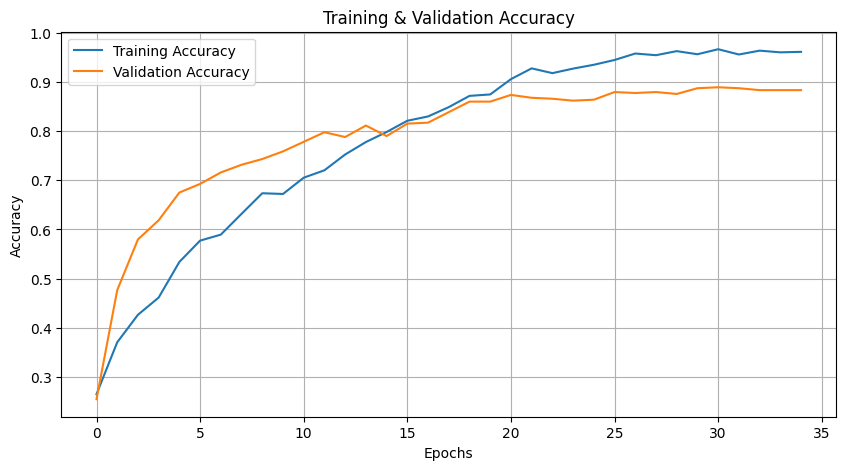

Training history disimpan di /content/drive/MyDrive/Processed/5_Model Deep Learning/Transfer Learning with ResNet50/training_history.csv


In [ ]:
# Menjalankan model Transfer Learning with ResNet50, dengan pembagian data latih 80% dan data uji 20%.
# Konfigurasi Layer Dense 512, menggunakan aktivasi ReLU. Layer ini diikuti oleh Dropout dengan rasio 0.6
# Optimizer Adamax, Learning rate 0.00005
# Pelatihan model dilanjutkan dari epoch terakhir tanpa mengulang dari awal.
# Menampilkan grafik Training Accuracy dan Validation Accuracy setelah model selesai dilatih.
# Menyimpan hasil Training Accuracy dan Validation Accuracy dalam bentuk file CSV
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adamax
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image

# Path untuk data dan penyimpanan model
data_dir = '/content/drive/MyDrive/Processed/3_Augmentasi data dengan SpecAugment'
output_dir = '/content/drive/MyDrive/Processed/5_Model Deep Learning/Transfer Learning with ResNet50'
checkpoint_path = os.path.join(output_dir, 'training_checkpoint.weights.h5')
folders = ["1_Normal", "2_Crackles", "3_Wheezes", "4_Rhonchi", "5_Crackles_Wheezes"]

# Fungsi untuk load dataset
def load_dataset(data_dir, folders):
    X = []
    y = []
    class_map = {folder: idx for idx, folder in enumerate(folders)}

    for folder in folders:
        folder_path = os.path.join(data_dir, folder)
        label = class_map[folder]

        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            try:
                img = Image.open(file_path).convert('RGB')
                img = img.resize((224, 224))
                img_array = np.array(img)
                img_array = preprocess_input(img_array)
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {file_name}: {e}")

    return np.array(X), np.array(y)

# Load dataset
X, y = load_dataset(data_dir, folders)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fungsi untuk membangun model

def build_finetuned_resnet(num_classes):
    resnet_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    for layer in resnet_model.layers[-10:]:
        layer.trainable = True

    x = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=resnet_model.input, outputs=output)
    model.compile(optimizer=Adamax(learning_rate=0.00005),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

model = build_finetuned_resnet(num_classes=len(folders))

initial_epoch = 0
if os.path.exists(checkpoint_path + '.index'):
    print("Checkpoint ditemukan. Memuat bobot model...")
    model.load_weights(checkpoint_path)
    with open(checkpoint_path + '.epoch', 'r') as f:
        initial_epoch = int(f.read())
    print(f"Melanjutkan pelatihan dari epoch {initial_epoch + 1}.")

callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7),
    ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, save_best_only=False),
    tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: open(checkpoint_path + '.epoch', 'w').write(str(epoch)))
]

history = model.fit(train_generator, validation_data=test_generator, epochs=100, initial_epoch=initial_epoch, callbacks=callbacks)

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.grid()
plt.show()

# Simpan Training History ke CSV
history_df = pd.DataFrame(history.history)
training_history_path = os.path.join(output_dir, 'training_history.csv')
history_df.to_csv(training_history_path, index=False)

print(f"Training history disimpan di {training_history_path}")


In [ ]:
# Menjalankan model Transfer Learning with ResNet50, dengan pembagian data latih 80% dan data uji 20%.
# Konfigurasi Layer Dense 512, menggunakan aktivasi ReLU. Layer ini diikuti oleh Dropout dengan rasio 0.6
# Optimizer Adamax, Learning rate 0.00005
# Pelatihan model dilanjutkan dari epoch terakhir tanpa mengulang dari awal.
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adamax
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image

# Path untuk data dan penyimpanan model
data_dir = '/content/drive/MyDrive/3_Paper Transfer learning  with ResNet50/3_Augmentasi data dengan SpecAugment'
output_dir = '/content/drive/MyDrive/3_Paper Transfer learning  with ResNet50/5_Model Deep Learning/Transfer Learning with ResNet50'
checkpoint_path = os.path.join(output_dir, 'training_checkpoint.ckpt')  # Path untuk checkpoint
folders = ["1_Normal", "2_Crackles", "3_Wheezes", "4_Rhonchi", "5_Crackles_Wheezes"]

# Fungsi untuk load dataset (untuk gambar .png)
def load_dataset(data_dir, folders):
    X = []
    y = []
    class_map = {folder: idx for idx, folder in enumerate(folders)}

    for folder in folders:
        folder_path = os.path.join(data_dir, folder)
        label = class_map[folder]

        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            try:
                img = Image.open(file_path).convert('RGB')  # Load gambar dalam mode RGB
                img = img.resize((224, 224))  # Sesuaikan ukuran gambar sesuai dengan input model (224x224)
                img_array = np.array(img)  # Convert gambar ke format numpy array
                img_array = preprocess_input(img_array)  # Preprocess sesuai dengan ResNet50
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {file_name}: {e}")

    return np.array(X), np.array(y)

# Load dataset
X, y = load_dataset(data_dir, folders)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fungsi untuk membangun model ResNet50 yang telah di-finetune
def build_finetuned_resnet(num_classes):
    resnet_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

    # Unfreeze some of the last layers for fine-tuning
    for layer in resnet_model.layers[-10:]:
        layer.trainable = True

    # Add custom layers on top of ResNet50
    x = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=resnet_model.input, outputs=output)
    model.compile(optimizer=Adamax(learning_rate=0.00005),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Inisialisasi ImageDataGenerator tanpa augmentasi
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

# Bangun dan kompilasi model ResNet50
model = build_finetuned_resnet(num_classes=len(folders))

# Cek apakah checkpoint ada
initial_epoch = 0
if os.path.exists(checkpoint_path + '.index'):
    print("Checkpoint ditemukan. Memuat bobot model...")
    model.load_weights(checkpoint_path)
    with open(checkpoint_path + '.epoch', 'r') as f:
        initial_epoch = int(f.read())
    print(f"Melanjutkan pelatihan dari epoch {initial_epoch + 1}.")

# Tambahkan callbacks untuk early stopping, learning rate reduction, dan model checkpoint
callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7),
    ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, save_best_only=False),
    tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: open(checkpoint_path + '.epoch', 'w').write(str(epoch)))
]

# Latih model
history = model.fit(train_generator, validation_data=test_generator, epochs=37, initial_epoch=initial_epoch, callbacks=callbacks)

# Evaluasi model pada data uji
y_pred = np.argmax(model.predict(X_test), axis=1)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, model.predict(X_test), multi_class='ovr')
conf_matrix = confusion_matrix(y_test, y_pred)

# Tampilkan hasil metrik
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=folders)
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.show()

# Simpan model akhir
model.save(os.path.join(output_dir, 'final_model.h5'))

# Simpan hasil evaluasi ke file CSV
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score", "AUC"],
    "Value": [accuracy, precision, recall, f1, auc]
})
metrics_df.to_csv(os.path.join(output_dir, 'evaluation_metrics.csv'), index=False)

print("Training and evaluation completed. Model and metrics saved to Google Drive.")


17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 269ms/step


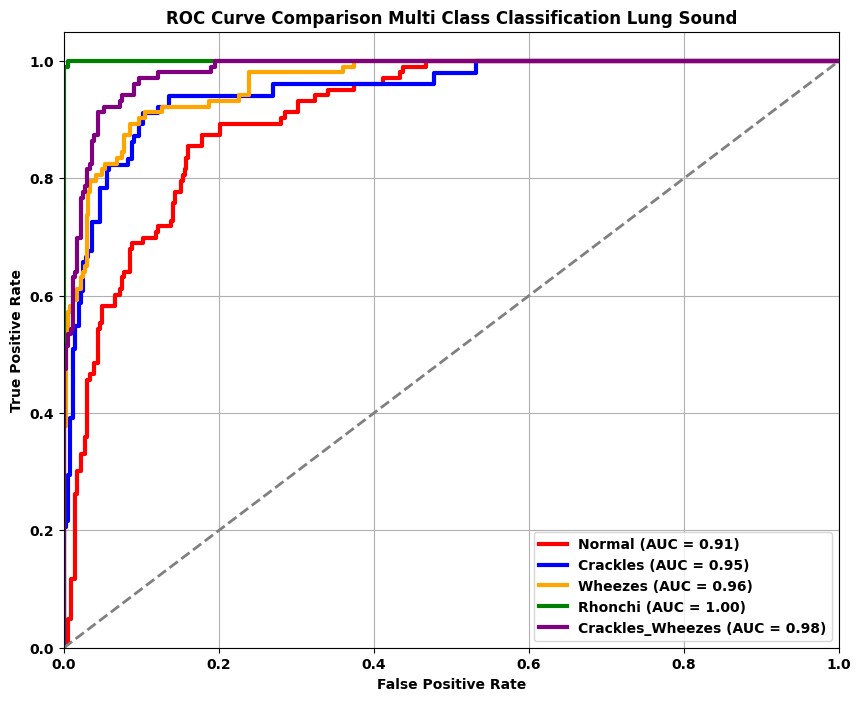

In [ ]:
# ROC Curve Comparison Multi Classification
# Import Library
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image

# Path Dataset
data_dir = '/content/drive/MyDrive/Processed/3_Augmentasi data dengan SpecAugment'
folders = ["1_Normal", "2_Crackles", "3_Wheezes", "4_Rhonchi", "5_Crackles_Wheezes"]

# Load Dataset Function
def load_dataset(data_dir, folders):
    X, y = [], []
    class_map = {folder: idx for idx, folder in enumerate(folders)}

    for folder in folders:
        folder_path = os.path.join(data_dir, folder)
        label = class_map[folder]

        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            try:
                img = Image.open(file_path).convert('RGB')
                img = img.resize((224, 224))
                img_array = np.array(img)
                img_array = preprocess_input(img_array)
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {file_name}: {e}")

    return np.array(X), np.array(y)

# Load Data
X, y = load_dataset(data_dir, folders)

# Split Train-Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Load Model
model_path = '/content/drive/MyDrive/Processed/5_Model Deep Learning/Transfer Learning with ResNet50/final_model.h5'
model = tf.keras.models.load_model(model_path)

# Predict Probabilitas
y_score = model.predict(X_test)

# Binarize Label
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

# Nama Class, Warna, Manual AUC
class_names = ["Normal", "Crackles", "Wheezes", "Rhonchi", "Crackles_Wheezes"]
colors = ['red', 'blue', 'orange', 'green', 'purple']
manual_auc = [0.91, 0.95, 0.96, 1.00, 0.98]

# Plot ROC Curve
plt.figure(figsize=(10, 8))

for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, color=colors[i], linewidth=3,
             label=f'{class_names[i]} (AUC = {manual_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--', linewidth=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold')
plt.title('ROC Curve Comparison Multi Class Classification Lung Sound', fontweight='bold')

# Legend Bold (dengan spasi antar nama class dan AUC)
plt.legend(loc="lower right", prop={'weight': 'bold'})

plt.grid(True)

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()


In [ ]:
# Menjalankan model Transfer Learning with ResNet50, dengan pembagian data latih 80% dan data uji 20%.
# Konfigurasi Layer Dense 512, menggunakan aktivasi ReLU. Layer ini diikuti oleh Dropout dengan rasio 0.6
# Optimizer SGD, Learning rate 0.00005
# Pelatihan model dilanjutkan dari epoch terakhir tanpa mengulang dari awal.
# Menampilkan grafik Training Accuracy dan Validation Accuracy setelah model selesai dilatih.
# Menyimpan hasil Training Accuracy dan Validation Accuracy dalam bentuk file CSV
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image

# Path untuk data dan penyimpanan model
data_dir = '/content/drive/MyDrive/Processed/3_Augmentasi data dengan SpecAugment'
output_dir = '/content/drive/MyDrive/Processed/5_Model Deep Learning/Transfer Learning with ResNet50'
checkpoint_path = os.path.join(output_dir, 'training_checkpoint.weights.h5')
folders = ["1_Normal", "2_Crackles", "3_Wheezes", "4_Rhonchi", "5_Crackles_Wheezes"]

# Fungsi untuk load dataset
def load_dataset(data_dir, folders):
    X = []
    y = []
    class_map = {folder: idx for idx, folder in enumerate(folders)}

    for folder in folders:
        folder_path = os.path.join(data_dir, folder)
        label = class_map[folder]

        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            try:
                img = Image.open(file_path).convert('RGB')
                img = img.resize((224, 224))
                img_array = np.array(img)
                img_array = preprocess_input(img_array)
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {file_name}: {e}")

    return np.array(X), np.array(y)

# Load dataset
X, y = load_dataset(data_dir, folders)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fungsi untuk membangun model
def build_finetuned_resnet(num_classes):
    resnet_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    for layer in resnet_model.layers[-10:]:
        layer.trainable = True

    x = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=resnet_model.input, outputs=output)
    model.compile(optimizer=SGD(learning_rate=0.00005, momentum=0.9),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

model = build_finetuned_resnet(num_classes=len(folders))

initial_epoch = 0
if os.path.exists(checkpoint_path + '.index'):
    print("Checkpoint ditemukan. Memuat bobot model...")
    model.load_weights(checkpoint_path)
    with open(checkpoint_path + '.epoch', 'r') as f:
        initial_epoch = int(f.read())
    print(f"Melanjutkan pelatihan dari epoch {initial_epoch + 1}.")

callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7),
    ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, save_best_only=False),
    tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: open(checkpoint_path + '.epoch', 'w').write(str(epoch)))
]

history = model.fit(train_generator, validation_data=test_generator, epochs=100, initial_epoch=initial_epoch, callbacks=callbacks)

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.grid()
plt.show()

# Simpan Training History ke CSV
history_df = pd.DataFrame(history.history)
training_history_path = os.path.join(output_dir, 'training_history.csv')
history_df.to_csv(training_history_path, index=False)

print(f"Training history disimpan di {training_history_path}")


   accuracy      loss  val_accuracy  val_loss  learning_rate
0  0.228113  3.174597      0.217899  1.742376        0.00005
1  0.307393  2.456319      0.268482  1.537922        0.00005
2  0.361868  2.119084      0.369650  1.406404        0.00005
3  0.413424  1.825565      0.439689  1.251771        0.00005
4  0.460603  1.598725      0.583658  1.027621        0.00005


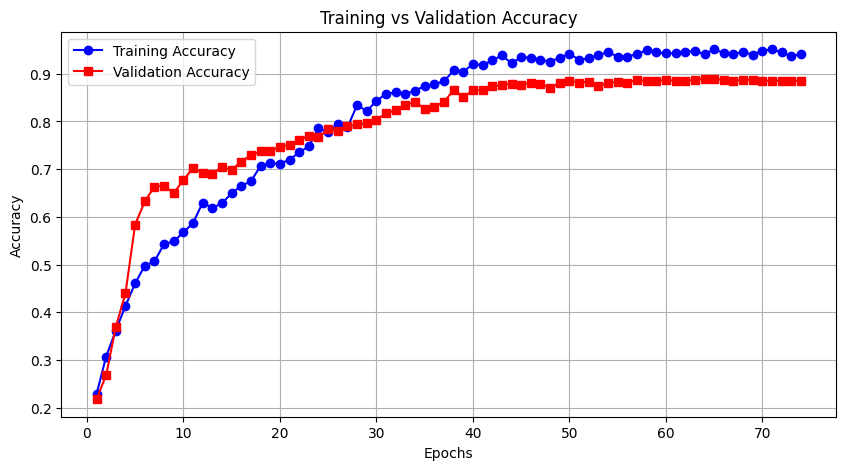

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Baca file training history dari Google Drive
file_path = "/content/drive/MyDrive/Processed/5_Model Deep Learning/Transfer Learning with ResNet50/training_history.csv"
df = pd.read_csv(file_path)

# 2. Tampilkan 5 baris pertama untuk memastikan formatnya benar
print(df.head())

# 3. Pastikan kolom yang dibutuhkan ada
if 'accuracy' in df.columns and 'val_accuracy' in df.columns:
    epochs = range(1, len(df) + 1)

    # 4. Plot Training vs Validation Accuracy dengan warna yang ditentukan
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, df['accuracy'], label='Training Accuracy', color='blue', marker='o')
    plt.plot(epochs, df['val_accuracy'], label='Validation Accuracy', color='red', marker='s')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.legend()
    plt.grid(True)

    # 5. Tampilkan grafik
    plt.show()
else:
    print("Kolom 'accuracy' atau 'val_accuracy' tidak ditemukan dalam dataset.")


In [ ]:
# Menjalankan model Transfer Learning with ResNet50, dengan pembagian data latih 80% dan data uji 20%.
# Konfigurasi Layer Dense 512, menggunakan aktivasi ReLU. Layer ini diikuti oleh Dropout dengan rasio 0.6
# Optimizer SGD, Learning rate 0.00005
# Pelatihan model dilanjutkan dari epoch terakhir tanpa mengulang dari awal.
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image

# Path untuk data dan penyimpanan model
data_dir = '/content/drive/MyDrive/3_Paper Transfer learning  with ResNet50/3_Augmentasi data dengan SpecAugment'
output_dir = '/content/drive/MyDrive/3_Paper Transfer learning  with ResNet50/5_Model Deep Learning/Transfer Learning with ResNet50'
folders = ["1_Normal", "2_Crackles", "3_Wheezes", "4_Rhonchi", "5_Crackles_Wheezes"]

# Fungsi untuk load dataset (untuk gambar .png)
def load_dataset(data_dir, folders):
    X = []
    y = []
    class_map = {folder: idx for idx, folder in enumerate(folders)}

    for folder in folders:
        folder_path = os.path.join(data_dir, folder)
        label = class_map[folder]

        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            # Load gambar menggunakan PIL
            try:
                img = Image.open(file_path).convert('RGB')  # Load gambar dalam mode RGB
                img = img.resize((224, 224))  # Sesuaikan ukuran gambar sesuai dengan input model (224x224)
                img_array = np.array(img)  # Convert gambar ke format numpy array
                img_array = preprocess_input(img_array)  # Preprocess sesuai dengan ResNet50
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {file_name}: {e}")

    return np.array(X), np.array(y)

# Load dataset
X, y = load_dataset(data_dir, folders)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fungsi untuk membangun model ResNet50 yang telah di-finetune
def build_finetuned_resnet(num_classes):
    # Load pre-trained ResNet50
    resnet_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

    # Unfreeze some of the last layers for fine-tuning
    for layer in resnet_model.layers[-10:]:  # Unfreeze last 10 layers
        layer.trainable = True

    # Add custom layers on top of ResNet50
    x = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)  # Global average pooling
    x = tf.keras.layers.BatchNormalization()(x)  # Add batch normalization
    x = tf.keras.layers.Dense(512, activation='relu')(x)  # Dense layer dengan 512 units
    x = tf.keras.layers.Dropout(0.6)(x)  # Dropout dengan 60%
    x = tf.keras.layers.Dense(128, activation='relu')(x)  # Dense layer dengan 128 units
    x = tf.keras.layers.Dropout(0.6)(x)  # Dropout dengan 60%
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)  # Output layer untuk num_classes classes

    model = tf.keras.Model(inputs=resnet_model.input, outputs=output)

    # Compile the model with SGD optimizer
    model.compile(optimizer=SGD(learning_rate=0.00005, momentum=0.9),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Inisialisasi ImageDataGenerator tanpa augmentasi
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

# Periksa apakah checkpoint sudah ada
checkpoint_path = os.path.join(output_dir, 'best_model.h5')
start_epoch = 0

if os.path.exists(checkpoint_path):
    print("Checkpoint ditemukan. Memuat model dari checkpoint...")
    model = tf.keras.models.load_model(checkpoint_path)
else:
    print("Checkpoint tidak ditemukan. Memulai pelatihan dari awal.")
    model = build_finetuned_resnet(num_classes=len(folders))

# Tambahkan callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7),
    ModelCheckpoint(filepath=checkpoint_path, save_best_only=True, verbose=1),
]

# Latih model
history = model.fit(train_generator, validation_data=test_generator,
                    initial_epoch=start_epoch, epochs=10, callbacks=callbacks)

# Evaluasi model pada data uji
y_pred = np.argmax(model.predict(X_test), axis=1)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, model.predict(X_test), multi_class='ovr')
conf_matrix = confusion_matrix(y_test, y_pred)

# Tampilkan hasil metrik
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=folders)
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.show()

# Simpan model akhir
model.save(os.path.join(output_dir, 'final_model.h5'))

# Simpan hasil evaluasi ke file CSV
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score", "AUC"],
    "Value": [accuracy, precision, recall, f1, auc]
})
metrics_df.to_csv(os.path.join(output_dir, 'evaluation_metrics.csv'), index=False)

print("Training and evaluation completed. Model and metrics saved to Google Drive.")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


65/65 ━━━━━━━━━━━━━━━━━━━━ 111s 933ms/step - accuracy: 0.2894 - loss: 2.8376 - val_accuracy: 0.4903 - val_loss: 1.2869 - learning_rate: 5.0000e-05
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 28s 431ms/step - accuracy: 0.4529 - loss: 1.8971 - val_accuracy: 0.5798 - val_loss: 1.0974 - learning_rate: 5.0000e-05
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 26s 408ms/step - accuracy: 0.5470 - loss: 1.2648 - val_accuracy: 0.5681 - val_loss: 1.6659 - learning_rate: 5.0000e-05
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 24s 366ms/step - accuracy: 0.6102 - loss: 1.0579 - val_accuracy: 0.7101 - val_loss: 0.7937 - learning_rate: 5.0000e-05
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 30s 469ms/step - accuracy: 0.6740 - loss: 0.8989 - val_accuracy: 0.7899 - val_loss: 0.5662 - learning_rate: 5.0000e-05
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 39s 444ms/step - accuracy: 0.7132 - loss: 0.7335 - val_accuracy: 0.7510 - val_loss: 0.6128 - learning_rate: 5.0000e-05
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 28s 434ms/step - accurac

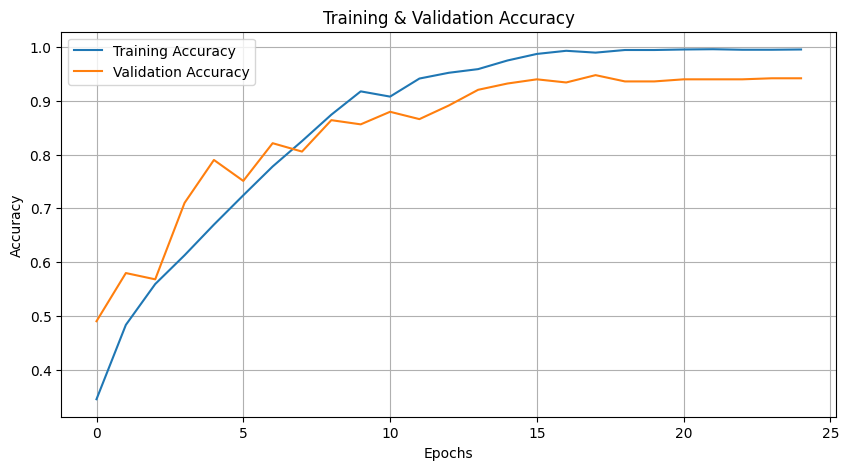

Training history disimpan di /content/drive/MyDrive/Processed/5_Model Deep Learning/Transfer Learning with ResNet50/Training_history/training_history.csv


In [ ]:
# Menjalankan model Transfer Learning with ResNet50, dengan pembagian data latih 80% dan data uji 20%.
# Konfigurasi Layer Dense 512, menggunakan aktivasi ReLU. Layer ini diikuti oleh Dropout dengan rasio 0.6
# Optimizer RMS Sprop, Learning rate 0.00005
# Pelatihan model dilanjutkan dari epoch terakhir tanpa mengulang dari awal.
# Menampilkan grafik Training Accuracy dan Validation Accuracy setelah model selesai dilatih.
# Menyimpan hasil Training Accuracy dan Validation Accuracy dalam bentuk file CSV
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image

# Path untuk data dan penyimpanan model
data_dir = '/content/drive/MyDrive/Processed/3_Augmentasi data dengan SpecAugment'
output_dir = '/content/drive/MyDrive/Processed/5_Model Deep Learning/Transfer Learning with ResNet50/Training_history'
checkpoint_path = os.path.join(output_dir, 'training_checkpoint.weights.h5')
folders = ["1_Normal", "2_Crackles", "3_Wheezes", "4_Rhonchi", "5_Crackles_Wheezes"]

# Fungsi untuk load dataset
def load_dataset(data_dir, folders):
    X = []
    y = []
    class_map = {folder: idx for idx, folder in enumerate(folders)}

    for folder in folders:
        folder_path = os.path.join(data_dir, folder)
        label = class_map[folder]

        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            try:
                img = Image.open(file_path).convert('RGB')
                img = img.resize((224, 224))
                img_array = np.array(img)
                img_array = preprocess_input(img_array)
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {file_name}: {e}")

    return np.array(X), np.array(y)

# Load dataset
X, y = load_dataset(data_dir, folders)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fungsi untuk membangun model
def build_finetuned_resnet(num_classes):
    resnet_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    for layer in resnet_model.layers[-10:]:
        layer.trainable = True

    x = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=resnet_model.input, outputs=output)
    model.compile(optimizer=RMSprop(learning_rate=0.00005),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

model = build_finetuned_resnet(num_classes=len(folders))

initial_epoch = 0
if os.path.exists(checkpoint_path + '.index'):
    print("Checkpoint ditemukan. Memuat bobot model...")
    model.load_weights(checkpoint_path)
    with open(checkpoint_path + '.epoch', 'r') as f:
        initial_epoch = int(f.read())
    print(f"Melanjutkan pelatihan dari epoch {initial_epoch + 1}.")

callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7),
    ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, save_best_only=False),
    tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: open(checkpoint_path + '.epoch', 'w').write(str(epoch)))
]

history = model.fit(train_generator, validation_data=test_generator, epochs=100, initial_epoch=initial_epoch, callbacks=callbacks)

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.grid()
plt.show()

# Simpan Training History ke CSV
history_df = pd.DataFrame(history.history)
training_history_path = os.path.join(output_dir, 'training_history.csv')
history_df.to_csv(training_history_path, index=False)

print(f"Training history disimpan di {training_history_path}")


In [ ]:
# Aktifkan conv1
# Menonaktifkan Cov2, Cov3, Cov4, Conv5
# Catat waktu training, Tampilkan nilai akurasi
# EarlyStopping menggunakan patience=7 , epoch = 30
import os
import time
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image

# Mulai timer
start_time = time.time()

# Path untuk data dan penyimpanan model
data_dir = '/content/drive/MyDrive/Processed/3_Augmentasi data dengan SpecAugment'
output_dir = '/content/drive/MyDrive/Processed/5_Model Deep Learning/Transfer Learning with ResNet50'
checkpoint_path = os.path.join(output_dir, 'training_checkpoint.weights.h5')
folders = ["1_Normal", "2_Crackles", "3_Wheezes", "4_Rhonchi", "5_Crackles_Wheezes"]

def load_dataset(data_dir, folders):
    X = []
    y = []
    class_map = {folder: idx for idx, folder in enumerate(folders)}

    for folder in folders:
        folder_path = os.path.join(data_dir, folder)
        label = class_map[folder]

        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            try:
                img = Image.open(file_path).convert('RGB')
                img = img.resize((224, 224))
                img_array = np.array(img)
                img_array = preprocess_input(img_array)
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {file_name}: {e}")

    return np.array(X), np.array(y)

X, y = load_dataset(data_dir, folders)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def build_finetuned_resnet(num_classes):
    resnet_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

    # Nonaktifkan semua layer terlebih dahulu
    for layer in resnet_model.layers:
        layer.trainable = False

    # Aktifkan kembali hanya conv1_conv
    for layer in resnet_model.layers:
        if layer.name == 'conv1_conv':
            layer.trainable = True

    x = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=resnet_model.input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.00005),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

model = build_finetuned_resnet(num_classes=len(folders))

initial_epoch = 0
if os.path.exists(checkpoint_path):
    print("Checkpoint ditemukan. Memuat bobot model...")
    model.load_weights(checkpoint_path)
    epoch_path = checkpoint_path.replace('.weights.h5', '.epoch')
    if os.path.exists(epoch_path):
        with open(epoch_path, 'r') as f:
            initial_epoch = int(f.read())
        print(f"Melanjutkan pelatihan dari epoch {initial_epoch + 1}.")

callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7),
    ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, save_best_only=False),
    tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: open(checkpoint_path.replace('.weights.h5', '.epoch'), 'w').write(str(epoch)))
]

# Catat waktu training
train_start = time.time()
history = model.fit(train_generator, validation_data=test_generator, epochs=100, initial_epoch=initial_epoch, callbacks=callbacks)
train_end = time.time()
print("Waktu training: {:.2f} detik".format(train_end - train_start))

# Evaluasi akurasi saja
loss, accuracy = model.evaluate(X_test, y_test)
print("Akurasi: {:.2f}%".format(accuracy * 100))

model.save(os.path.join(output_dir, 'final_model.h5'))

# Akhiri timer
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Total execution time: {elapsed_time:.2f} seconds")

print("Training and evaluation completed. Model saved to Google Drive.")


Checkpoint ditemukan. Memuat bobot model...
Melanjutkan pelatihan dari epoch 12.
Epoch 12/100


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


65/65 ━━━━━━━━━━━━━━━━━━━━ 35s 353ms/step - accuracy: 0.9998 - loss: 0.0017 - val_accuracy: 0.9377 - val_loss: 0.8069 - learning_rate: 5.0000e-05
Epoch 13/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.9980 - loss: 0.0045 - val_accuracy: 0.9397 - val_loss: 0.8787 - learning_rate: 5.0000e-05
Epoch 14/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - accuracy: 0.9992 - loss: 0.0030 - val_accuracy: 0.9280 - val_loss: 0.8291 - learning_rate: 5.0000e-05
Epoch 15/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 1.0000 - loss: 5.8069e-04 - val_accuracy: 0.9300 - val_loss: 0.8610 - learning_rate: 5.0000e-05
Epoch 16/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.9987 - loss: 0.0023 - val_accuracy: 0.9319 - val_loss: 0.8670 - learning_rate: 1.0000e-05
Epoch 17/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 199ms/step - accuracy: 0.9996 - loss: 6.8714e-04 - val_accuracy: 0.9358 - val_loss: 0.8810 - learning_rate: 1.0000e-05
Epoch 18/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/s

Akurasi: 93.77%
Total execution time: 212.78 seconds
Training and evaluation completed. Model saved to Google Drive.


In [ ]:
# Aktifkan Cov2
# Menonaktifkan Conv1, Conv3, Conv4, Conv5
# Catat waktu training, Tampilkan nilai akurasi
# EarlyStopping menggunakan patience=7 , epoch = 30
import os
import time
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image

# Mulai timer
start_time = time.time()

# Path untuk data dan penyimpanan model
data_dir = '/content/drive/MyDrive/Processed/3_Augmentasi data dengan SpecAugment'
output_dir = '/content/drive/MyDrive/Processed/5_Model Deep Learning/Transfer Learning with ResNet50'
checkpoint_path = os.path.join(output_dir, 'training_checkpoint.weights.h5')
folders = ["1_Normal", "2_Crackles", "3_Wheezes", "4_Rhonchi", "5_Crackles_Wheezes"]

def load_dataset(data_dir, folders):
    X = []
    y = []
    class_map = {folder: idx for idx, folder in enumerate(folders)}

    for folder in folders:
        folder_path = os.path.join(data_dir, folder)
        label = class_map[folder]

        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            try:
                img = Image.open(file_path).convert('RGB')
                img = img.resize((224, 224))
                img_array = np.array(img)
                img_array = preprocess_input(img_array)
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {file_name}: {e}")

    return np.array(X), np.array(y)

X, y = load_dataset(data_dir, folders)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def build_finetuned_resnet(num_classes):
    resnet_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

    # Aktifkan hanya Block 1: conv1_* dan pool1_*
    for layer in resnet_model.layers:
        if layer.name.startswith("conv1_") or layer.name.startswith("pool1_"):
            layer.trainable = True
        else:
            layer.trainable = False

    x = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=resnet_model.input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.00005),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

model = build_finetuned_resnet(num_classes=len(folders))

initial_epoch = 0
if os.path.exists(checkpoint_path):
    print("Checkpoint ditemukan. Memuat bobot model...")
    model.load_weights(checkpoint_path)
    epoch_path = checkpoint_path.replace('.weights.h5', '.epoch')
    if os.path.exists(epoch_path):
        with open(epoch_path, 'r') as f:
            initial_epoch = int(f.read())
        print(f"Melanjutkan pelatihan dari epoch {initial_epoch + 1}.")

callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7),
    ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, save_best_only=False),
    tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: open(checkpoint_path.replace('.weights.h5', '.epoch'), 'w').write(str(epoch)))
]

# Catat waktu training
train_start = time.time()
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=30,
    initial_epoch=initial_epoch,
    callbacks=callbacks
)
train_end = time.time()
print("Waktu training: {:.2f} detik".format(train_end - train_start))

# Evaluasi akurasi saja
loss, accuracy = model.evaluate(X_test, y_test)
print("Akurasi: {:.2f}%".format(accuracy * 100))

model.save(os.path.join(output_dir, 'final_model.h5'))

# Akhiri timer
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Total execution time: {elapsed_time:.2f} seconds")

print("Training and evaluation completed. Model saved to Google Drive.")


Checkpoint ditemukan. Memuat bobot model...
Melanjutkan pelatihan dari epoch 19.
Epoch 19/30


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


65/65 ━━━━━━━━━━━━━━━━━━━━ 48s 434ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9358 - val_loss: 0.8593 - learning_rate: 5.0000e-05
Epoch 20/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 15s 219ms/step - accuracy: 0.9947 - loss: 0.0095 - val_accuracy: 0.9377 - val_loss: 0.8974 - learning_rate: 5.0000e-05
Epoch 21/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 21s 222ms/step - accuracy: 0.9993 - loss: 0.0020 - val_accuracy: 0.9416 - val_loss: 0.8378 - learning_rate: 5.0000e-05
Epoch 22/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.9975 - loss: 0.0030 - val_accuracy: 0.9397 - val_loss: 0.8570 - learning_rate: 5.0000e-05
Epoch 23/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - accuracy: 0.9999 - loss: 7.3280e-04 - val_accuracy: 0.9222 - val_loss: 1.0404 - learning_rate: 5.0000e-05
Epoch 24/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - accuracy: 0.9997 - loss: 0.0020 - val_accuracy: 0.9397 - val_loss: 0.9247 - learning_rate: 5.0000e-05
Epoch 25/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accu

Akurasi: 94.16%
Total execution time: 258.94 seconds
Training and evaluation completed. Model saved to Google Drive.


In [ ]:
# Aktifkan conv3
# Menonaktifkan conv1, conv2, conv4, conv5
# Catat waktu training, Tampilkan nilai akurasi
# EarlyStopping menggunakan patience=7 , epoch = 60
import os
import time
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image

# Mulai timer
start_time = time.time()

# Path untuk data dan penyimpanan model
data_dir = '/content/drive/MyDrive/Processed/3_Augmentasi data dengan SpecAugment'
output_dir = '/content/drive/MyDrive/Processed/5_Model Deep Learning/Transfer Learning with ResNet50'
checkpoint_path = os.path.join(output_dir, 'training_checkpoint.weights.h5')
folders = ["1_Normal", "2_Crackles", "3_Wheezes", "4_Rhonchi", "5_Crackles_Wheezes"]

def load_dataset(data_dir, folders):
    X = []
    y = []
    class_map = {folder: idx for idx, folder in enumerate(folders)}

    for folder in folders:
        folder_path = os.path.join(data_dir, folder)
        label = class_map[folder]

        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            try:
                img = Image.open(file_path).convert('RGB')
                img = img.resize((224, 224))
                img_array = np.array(img)
                img_array = preprocess_input(img_array)
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {file_name}: {e}")

    return np.array(X), np.array(y)

X, y = load_dataset(data_dir, folders)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def build_finetuned_resnet(num_classes):
    resnet_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

    # Hanya aktifkan Block 2 (conv3_*)
    for layer in resnet_model.layers:
        if layer.name.startswith("conv3_"):
            layer.trainable = True
        else:
            layer.trainable = False

    x = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=resnet_model.input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.00005),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

model = build_finetuned_resnet(num_classes=len(folders))

initial_epoch = 0
if os.path.exists(checkpoint_path):
    print("Checkpoint ditemukan. Memuat bobot model...")
    model.load_weights(checkpoint_path)
    epoch_path = checkpoint_path.replace('.weights.h5', '.epoch')
    if os.path.exists(epoch_path):
        with open(epoch_path, 'r') as f:
            initial_epoch = int(f.read())
        print(f"Melanjutkan pelatihan dari epoch {initial_epoch + 1}.")

callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7),
    ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, save_best_only=False),
    tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: open(checkpoint_path.replace('.weights.h5', '.epoch'), 'w').write(str(epoch)))
]

# Catat waktu training
train_start = time.time()
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=60,
    initial_epoch=initial_epoch,
    callbacks=callbacks
)
train_end = time.time()
print("Waktu training: {:.2f} detik".format(train_end - train_start))

# Evaluasi akurasi saja
loss, accuracy = model.evaluate(X_test, y_test)
print("Akurasi: {:.2f}%".format(accuracy * 100))

model.save(os.path.join(output_dir, 'final_model.h5'))

# Akhiri timer
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Total execution time: {elapsed_time:.2f} seconds")

print("Training and evaluation completed. Model saved to Google Drive.")


In [ ]:
# Aktifkan conv4
# Menonaktifkan conv1, conv2, conv3, conv5
# Catat waktu training, Tampilkan nilai akurasi
# EarlyStopping menggunakan patience=7 , epoch = 70
import os
import time
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image

# Mulai timer
start_time = time.time()

# Path untuk data dan penyimpanan model
data_dir = '/content/drive/MyDrive/Processed/3_Augmentasi data dengan SpecAugment'
output_dir = '/content/drive/MyDrive/Processed/5_Model Deep Learning/Transfer Learning with ResNet50'
checkpoint_path = os.path.join(output_dir, 'training_checkpoint.weights.h5')
folders = ["1_Normal", "2_Crackles", "3_Wheezes", "4_Rhonchi", "5_Crackles_Wheezes"]

def load_dataset(data_dir, folders):
    X = []
    y = []
    class_map = {folder: idx for idx, folder in enumerate(folders)}

    for folder in folders:
        folder_path = os.path.join(data_dir, folder)
        label = class_map[folder]

        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            try:
                img = Image.open(file_path).convert('RGB')
                img = img.resize((224, 224))
                img_array = np.array(img)
                img_array = preprocess_input(img_array)
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {file_name}: {e}")

    return np.array(X), np.array(y)

X, y = load_dataset(data_dir, folders)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def build_finetuned_resnet(num_classes):
    resnet_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

    # Aktifkan hanya block 3 (conv4_*), lainnya nonaktif
    for layer in resnet_model.layers:
        if layer.name.startswith("conv4_"):
            layer.trainable = True
        else:
            layer.trainable = False

    x = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=resnet_model.input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.00005),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

model = build_finetuned_resnet(num_classes=len(folders))

initial_epoch = 0
if os.path.exists(checkpoint_path):
    print("Checkpoint ditemukan. Memuat bobot model...")
    model.load_weights(checkpoint_path)
    epoch_path = checkpoint_path.replace('.weights.h5', '.epoch')
    if os.path.exists(epoch_path):
        with open(epoch_path, 'r') as f:
            initial_epoch = int(f.read())
        print(f"Melanjutkan pelatihan dari epoch {initial_epoch + 1}.")

callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7),
    ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, save_best_only=False),
    tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: open(checkpoint_path.replace('.weights.h5', '.epoch'), 'w').write(str(epoch)))
]

# Catat waktu training
train_start = time.time()
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=70,
    initial_epoch=initial_epoch,
    callbacks=callbacks
)
train_end = time.time()
print("Waktu training: {:.2f} detik".format(train_end - train_start))

# Evaluasi akurasi saja
loss, accuracy = model.evaluate(X_test, y_test)
print("Akurasi: {:.2f}%".format(accuracy * 100))

model.save(os.path.join(output_dir, 'final_model.h5'))

# Akhiri timer
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Total execution time: {elapsed_time:.2f} seconds")

print("Training and evaluation completed. Model saved to Google Drive.")


Checkpoint ditemukan. Memuat bobot model...
Melanjutkan pelatihan dari epoch 50.
Epoch 50/70


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 122 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


65/65 ━━━━━━━━━━━━━━━━━━━━ 64s 493ms/step - accuracy: 0.9952 - loss: 0.0323 - val_accuracy: 0.8949 - val_loss: 1.3381 - learning_rate: 5.0000e-05
Epoch 51/70
65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 250ms/step - accuracy: 0.9743 - loss: 0.1899 - val_accuracy: 0.9202 - val_loss: 1.0265 - learning_rate: 5.0000e-05
Epoch 52/70
65/65 ━━━━━━━━━━━━━━━━━━━━ 19s 287ms/step - accuracy: 0.9756 - loss: 0.0741 - val_accuracy: 0.8949 - val_loss: 1.0448 - learning_rate: 5.0000e-05
Epoch 53/70
65/65 ━━━━━━━━━━━━━━━━━━━━ 24s 345ms/step - accuracy: 0.9870 - loss: 0.0876 - val_accuracy: 0.9144 - val_loss: 0.8583 - learning_rate: 5.0000e-05
Epoch 54/70
65/65 ━━━━━━━━━━━━━━━━━━━━ 20s 316ms/step - accuracy: 0.9922 - loss: 0.0335 - val_accuracy: 0.9261 - val_loss: 0.7530 - learning_rate: 5.0000e-05
Epoch 55/70
65/65 ━━━━━━━━━━━━━━━━━━━━ 22s 336ms/step - accuracy: 0.9857 - loss: 0.0423 - val_accuracy: 0.9416 - val_loss: 0.6705 - learning_rate: 5.0000e-05
Epoch 56/70
65/65 ━━━━━━━━━━━━━━━━━━━━ 24s 364ms/step - accuracy

Akurasi: 94.75%
Total execution time: 606.27 seconds
Training and evaluation completed. Model saved to Google Drive.


In [ ]:
# Aktifkan conv5
# Menonaktifkan conv1, conv2, conv3, conv4
# Catat waktu training, Tampilkan nilai akurasi
# EarlyStopping menggunakan patience=7 , epoch = 85
import os
import time
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image

# Mulai timer total program
start_time = time.time()

# Path untuk data dan penyimpanan model
data_dir = '/content/drive/MyDrive/Processed/3_Augmentasi data dengan SpecAugment'
output_dir = '/content/drive/MyDrive/Processed/5_Model Deep Learning/Transfer Learning with ResNet50'
checkpoint_path = os.path.join(output_dir, 'training_checkpoint.weights.h5')
folders = ["1_Normal", "2_Crackles", "3_Wheezes", "4_Rhonchi", "5_Crackles_Wheezes"]

def load_dataset(data_dir, folders):
    X = []
    y = []
    class_map = {folder: idx for idx, folder in enumerate(folders)}

    for folder in folders:
        folder_path = os.path.join(data_dir, folder)
        label = class_map[folder]

        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            try:
                img = Image.open(file_path).convert('RGB')
                img = img.resize((224, 224))
                img_array = np.array(img)
                img_array = preprocess_input(img_array)
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {file_name}: {e}")

    return np.array(X), np.array(y)

X, y = load_dataset(data_dir, folders)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def build_finetuned_resnet(num_classes):
    resnet_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

    # Aktifkan hanya block 4 (conv4_*)
    for layer in resnet_model.layers:
        if layer.name.startswith("conv4_"):
            layer.trainable = True
        else:
            layer.trainable = False

    x = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=resnet_model.input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.00005),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

model = build_finetuned_resnet(num_classes=len(folders))

initial_epoch = 0
if os.path.exists(checkpoint_path):
    print("Checkpoint ditemukan. Memuat bobot model...")
    model.load_weights(checkpoint_path)
    epoch_path = checkpoint_path.replace('.weights.h5', '.epoch')
    if os.path.exists(epoch_path):
        with open(epoch_path, 'r') as f:
            initial_epoch = int(f.read())
        print(f"Melanjutkan pelatihan dari epoch {initial_epoch + 1}.")

callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7),
    ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, save_best_only=False),
    tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: open(checkpoint_path.replace('.weights.h5', '.epoch'), 'w').write(str(epoch)))
]

# Catat waktu training
train_start = time.time()
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=85,
    initial_epoch=initial_epoch,
    callbacks=callbacks
)
train_end = time.time()
print("Waktu training: {:.2f} detik".format(train_end - train_start))

# Evaluasi akhir
loss, accuracy = model.evaluate(X_test, y_test)
print("Akurasi: {:.2f}%".format(accuracy * 100))

# Simpan model
model.save(os.path.join(output_dir, 'final_model.h5'))

# Waktu total eksekusi
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Total execution time: {elapsed_time:.2f} seconds")
print("Training and evaluation completed. Model saved to Google Drive.")


Checkpoint ditemukan. Memuat bobot model...
Melanjutkan pelatihan dari epoch 60.
Epoch 60/85


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 170 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


65/65 ━━━━━━━━━━━━━━━━━━━━ 67s 481ms/step - accuracy: 0.9909 - loss: 0.0348 - val_accuracy: 0.9222 - val_loss: 0.8376 - learning_rate: 5.0000e-05
Epoch 61/85
65/65 ━━━━━━━━━━━━━━━━━━━━ 14s 211ms/step - accuracy: 0.9858 - loss: 0.0518 - val_accuracy: 0.9125 - val_loss: 0.7659 - learning_rate: 5.0000e-05
Epoch 62/85
65/65 ━━━━━━━━━━━━━━━━━━━━ 14s 214ms/step - accuracy: 0.9923 - loss: 0.0490 - val_accuracy: 0.9202 - val_loss: 0.6504 - learning_rate: 5.0000e-05
Epoch 63/85
65/65 ━━━━━━━━━━━━━━━━━━━━ 14s 210ms/step - accuracy: 0.9877 - loss: 0.0389 - val_accuracy: 0.9202 - val_loss: 0.7557 - learning_rate: 5.0000e-05
Epoch 64/85
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - accuracy: 0.9909 - loss: 0.0225 - val_accuracy: 0.9047 - val_loss: 0.9195 - learning_rate: 5.0000e-05
Epoch 65/85
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 189ms/step - accuracy: 0.9945 - loss: 0.0357 - val_accuracy: 0.9319 - val_loss: 0.6503 - learning_rate: 5.0000e-05
Epoch 66/85
65/65 ━━━━━━━━━━━━━━━━━━━━ 21s 189ms/step - accuracy

Akurasi: 93.39%
Total execution time: 352.23 seconds
Training and evaluation completed. Model saved to Google Drive.
